In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import zipfile 
zip_ref=zipfile.ZipFile("/content/drive/My Drive/fer2013.zip",'r')
zip_ref.extractall('/fer2013')
zip_ref.close()

<table>
    <tr style="border-top: 1px solid black; border-bottom: 1px solid black">
        <td>
            <h1>Classification d'images à partir des émotions faciales</h1>
        </td>
    </tr>
</table>


<center><i>Réalisé par : </i>Douba JAFUNO</center>

<table>
    <tr style="text-align: center;vertical-align:left">
    <td style="border-top: 1px solid black; border-bottom: 1px solid black;vertical-align: middle">     
 <h1>Plan du rapport</h1>
    </td>
   </tr>
</table>
 
<table style="width: 100%">
<tr>
    <td style="width: 15%">
    </td>
    <td style="width: 70%; text-align:left">
        <a href="#1"><h1>I. Introduction</h1></a><br>
        &nbsp; <a href="#neurb">I.1 Le neurone biologique</a><br>
        &emsp; <a href="#desgr">I.1.1 Apprentissage par descente de gradient</a><br>
        &nbsp; <a href="#neurf">I.2 Le neurone formel</a><br>
         &emsp; <a href="#lim">I.2.1 Limitation du neurone formel</a><br>
         &emsp; <a href="#mpn">I.2.2 Mettez plusieurs neurones en réseau</a><br>
         &emsp; <a href="#uc">I.2.3 Organisation en une couche</a><br> 
         &emsp; <a href="#pc">I.2.4 Organisation en plusieurs couches</a><br> 
        &emsp; <a href="#rg">I.2.5 Rétropropagation du gradient</a><br>
        &emsp; <a href="#agd">I.2.6 Autour du Gradient Descent</a><br>
        &emsp; <a href="#sam">I.2.7 SGD avec Momentum</a><br>
        &emsp; <a href="#rms">I.2.8 RMSProp</a><br>
        &emsp; <a href="#ada">I.2.8 Adam</a><br>
        &nbsp; <a href="#rprof">I.3 Réseaux profonds grâce aux couches convolutionnelles</a><br>
        &emsp; <a href="#pro">I.3.1 Problématiques liées aux réseaux profonds</a><br>
        &emsp; <a href="#uti">I.3.2 Utilisez la topologie des données</a><br>
        &emsp; <a href="#cou">I.3.3 Couche convolutionnelle (principe)</a><br>
        &emsp; <a href="#arc">I.3.4 Architecture globale d’un réseau convolutionnel</a><br>
        &emsp; <a href="#tl">I.3.5 Transfer Learning</a><br>
           

<a href="#2"><h1>II. Projet Facial Emotion  </h1></a><br><br>
    &nbsp; <a href="#presentation">II.1 Présentation du problème</a><br>
    &nbsp; <a href="#preparation">II.2 Préparation et Visualisation des données</a><br>
    &nbsp; <a href="#aei">II.3 Apprentissage sur l’ensemble des Images</a><br>
      &ensp; <a href="#cme1">II.3.1 Choix du modèle, entraînement et évaluation </a><br>
      &emsp; <a href="#acd">II.3.1.1 Ajout de couche dropout</a><br>
    &nbsp; <a href="#aik">II.4 Apprentissage avec ImageDataGénérator de Keras</a><br>
    &ensp; <a href="#cme2">II.4.1 Choix du modèle, entraînement et évaluation </a><br>
    &ensp; <a href="#ti1">II.4.2 Test sur une image</a><br>
    &nbsp; <a href="#aik">II.5 Avec le Transfert Learning</a><br>
    &ensp; <a href="#resn">II.5.1 ResNet50 </a><br>
    &ensp; <a href="#pdt">II.5.2 Préparation des données de test</a><br> 
    &ensp; <a href="#éval">II.5.3 Évaluation</a><br>
    &ensp; <a href="#ti2">II.5.4 Test sur une image</a><br>    
    
<a href="#3"><h1>III. Conclusion </h1></a><br><br>
     &nbsp; <a href="#ref">III.1 Références</a><br>
    </td>
    <td style="width: 0%">
    </td>
</tr>
</table>



# <a name="1">I. Introduction</a>

## <a name="neurb"> Le neurone biologique </a>
<p id="r-5843172" data-claire-element-id="29484594">Les réseaux de neurones artificiels ou RNN sont des <strong>modèles </strong><strong>mathématiques</strong> inspirés de la biologie.  La brique de base de ces réseaux, le neurone artificiel, était issu au départ d'une volonté de modélisation du fonctionnement d'un neurone biologique. Regardons donc comment fonctionne un neurone <em>in vivo</em>.</p><figure id="r-5843848" data-claire-element-id="30277024"><img id="r-5843846" data-claire-element-id="28118121" src="https://user.oc-static.com/upload/2018/12/03/1543850965662_2000px-Complete_neuron_cell_diagram_fr.svg.png" alt="Source: https://commons.wikimedia.org/wiki/File:Complete_neuron_cell_diagram_fr.svg   This work has been released into the public domain by its author, LadyofHats. This applies worldwide. In some countries this may not be legally possible; if so: LadyofHa" /><figcaption>Un neurone biologique [domaine public - source : https://commons.wikimedia.org/wiki/File:Complete_neuron_cell_diagram_fr.svg]</figcaption></figure><p id="r-5843174" data-claire-element-id="29259463">Schématiquement, on peut décomposer le neurone en 3 grandes entités :</p><ul id="r-5843181" data-claire-element-id="29484603"><li id="r-5843176" data-claire-element-id="29484598"><p id="r-5843175" data-claire-element-id="29484597">un <strong>corps cellulaire</strong>, appelé <em>péricaryon </em>;</p></li><li id="r-5843178" data-claire-element-id="29484600"><p id="r-5843177" data-claire-element-id="29484599">un <strong>ensemble de dendrites</strong> (de l'ordre de 7 000) ;</p></li><li id="r-5843180" data-claire-element-id="29484602"><p id="r-5843179" data-claire-element-id="29484601">un <strong>axone</strong>.</p></li></ul><aside id="r-6023927" data-claire-element-id="29484624" data-claire-semantic="information"><p id="r-5843182" data-claire-element-id="29484623">Les dendrites sont les capteurs du neurone. Elles transmettent l'influx nerveux (l'information) généré par des stimuli de leur extrémité au <em>péricaryon</em>. On dit que le flux est <em>centripète</em>.</p></aside><p id="r-5843183" data-claire-element-id="29484625">Lorsque l'excitation du corps cellulaire dépasse un certain seuil, un afflux nerveux est émis le long de l'axone de façon centrifuge, c'est-à-dire du corps cellulaire à l'extrémité de l'axone.


    
Le perceptron, encore appelé <em>neurone artificiel</em> ou <em>neurone formel</em>, cherche à reproduire le fonctionnement d'un neurone biologique. Il existe différents  niveaux d'abstraction, suivant la précision de la modélisation voulue.</p><p id="r-6023967" data-claire-element-id="28583324">Dans notre cas, nous n'allons pas chercher à reproduire exactement et exhaustivement tous les processus biologiques en œuvre dans un neurone biologique. Il s'agit d'une version <strong>simplifiée</strong>.</p><figure id="r-5873249" data-claire-element-id="30277027"><img id="r-5873247" data-claire-element-id="28192354" src="https://user.oc-static.com/upload/2018/12/10/15444553183515_neuroneformel-1.png" alt="Un neurone formel" /><figcaption></figcaption></figure><p id="r-5843708" data-claire-element-id="28583327"><em> </em>Nous allons considérer les entités suivantes :</p><ul id="r-5843196" data-claire-element-id="29484672"><li id="r-5843191" data-claire-element-id="29484667"><p id="r-5843190" data-claire-element-id="29484666">des <strong>entrées</strong>, notées <math>$x$</math> sous formes de vecteurs, représentant les dendrites ;</p></li><li id="r-5843193" data-claire-element-id="29484669"><p id="r-5843192" data-claire-element-id="29484668">une <strong>sortie</strong>, notée <math>$y$</math>, représentant l'axone ;</p></li><li id="r-5843195" data-claire-element-id="29484671"><p id="r-5843194" data-claire-element-id="29484670">des <strong>paramètres</strong>, notés <math>$w$</math> et <math>$b$</math> , influençant le fonctionnement du neurone.</p></li></ul><aside id="r-6023988" data-claire-element-id="28583376" data-claire-semantic="information"><p id="r-5843197" data-claire-element-id="28197967">Les entrées sont variables. Les paramètres sont fixés par construction du modèle. La sortie est calculée en fonction des entrées et des paramètres.</p></aside><p id="r-5843198" data-claire-element-id="28192358">Équation d'un neurone formel :<br />  <math>$\hat{y}=f(\langle w,x\rangle+b)$</math></p><p id="r-5843709" data-claire-element-id="29484696">Cette équation dit comment la sortie est calculée. Chaque entrée est multipliée par un poids, un coefficient <math>$w$</math>. Toutes les entrées sont alors sommées et additionnées à un biais <math>$b$</math> . Le résultat de la somme passe à travers une fonction de transfert <math>$f$</math> (le plus souvent non linéaire). Cette fonction produit alors la sortie voulue.</p><p id="r-5843200" data-claire-element-id="29484697">On le voit, plus les entrées sont grandes en valeur absolue, plus la somme peut être grande en valeur absolue. Nous sommes donc en <strong>modulation d'amplitude</strong> (et non plus de fréquence, comme dans un neurone biologique).</p><h4 id="r-5843726" data-claire-element-id="30277032">Exemple sur une séparation linéaire</h4><p id="r-5843711" data-claire-element-id="28115843">Regardons ce qu'il se passe pour un exemple simple.</p><figure id="r-5873315" data-claire-element-id="30277029"><img id="r-5873313" data-claire-element-id="28223197" src="https://user.oc-static.com/upload/2018/12/12/15446478370734_samples.png" alt="Points exemples" /><figcaption>Points exemples</figcaption></figure><p id="r-5843712" data-claire-element-id="28192520"><em> </em></p><p id="r-5843713" data-claire-element-id="28115845">Nous cherchons à classer ces points en deux camps.</p><p id="r-5843714" data-claire-element-id="28197999">Voici les paramètres d'un neurone adapté à ce problème :</p><p id="r-5873339" data-claire-element-id="28192580">Pour <math>$w$</math></p><table id="r-5873346" data-claire-element-id="28192587"><tbody id="r-5873345" data-claire-element-id="28192586"><tr id="r-5873344" data-claire-element-id="28192585"><td id="r-5873341" data-claire-element-id="28192582"><p id="r-5873340" data-claire-element-id="28192581">0.985</p></td><td id="r-5873343" data-claire-element-id="28192584"><p id="r-5873342" data-claire-element-id="28192583">2.186</p></td></tr></tbody></table><p id="r-5843715" data-claire-element-id="28192588">Pour <math>$b$</math></p><table id="r-5873351" data-claire-element-id="28192593"><tbody id="r-5873350" data-claire-element-id="28192592"><tr id="r-5873349" data-claire-element-id="28192591"><td id="r-5873348" data-claire-element-id="28192590"><p id="r-5873347" data-claire-element-id="28192589">-0.522</p></td></tr></tbody></table><p id="r-5843717" data-claire-element-id="28583629">On va appliquer l'équation du neurone sur quelques exemples. Les deux premières colonnes du tableau suivant montrent les <strong>coordonnées</strong> de l'exemple, la dernière colonne montre le <strong>résultat</strong> de l'application de l'équation du neurone.</p><table id="r-5873470" data-claire-element-id="28192925"><tbody id="r-5873469" data-claire-element-id="28192924"><tr id="r-5873405" data-claire-element-id="28192716"><td id="r-5873400" data-claire-element-id="28192711"><p id="r-5873399" data-claire-element-id="28192710"> <math>$x_0$</math></p></td><td id="r-5873402" data-claire-element-id="28192713"><p id="r-5873401" data-claire-element-id="28192712"> <math>$x_1$</math></p></td><td id="r-5873404" data-claire-element-id="28192715"><p id="r-5873403" data-claire-element-id="28192714"> <math>$\hat{y}$</math></p></td></tr><tr id="r-5873412" data-claire-element-id="28192895"><td id="r-5873407" data-claire-element-id="28192890"><p id="r-5873406" data-claire-element-id="28192889"> 0.896</p></td><td id="r-5873409" data-claire-element-id="28192892"><p id="r-5873408" data-claire-element-id="28192891"> 1.410</p></td><td id="r-5873411" data-claire-element-id="28192894"><p id="r-5873410" data-claire-element-id="28192893"> 3.445</p></td></tr><tr id="r-5873419" data-claire-element-id="28192902"><td id="r-5873414" data-claire-element-id="28192897"><p id="r-5873413" data-claire-element-id="28192896"> -1.509</p></td><td id="r-5873416" data-claire-element-id="28192899"><p id="r-5873415" data-claire-element-id="28192898"> -1.438</p></td><td id="r-5873418" data-claire-element-id="28192901"><p id="r-5873417" data-claire-element-id="28192900"> -5.155</p></td></tr><tr id="r-5873426" data-claire-element-id="28192909"><td id="r-5873421" data-claire-element-id="28192904"><p id="r-5873420" data-claire-element-id="28192903"> 1.443</p></td><td id="r-5873423" data-claire-element-id="28192906"><p id="r-5873422" data-claire-element-id="28192905"> 1.333</p></td><td id="r-5873425" data-claire-element-id="28192908"><p id="r-5873424" data-claire-element-id="28192907"> 3.816</p></td></tr><tr id="r-5873433" data-claire-element-id="28192916"><td id="r-5873428" data-claire-element-id="28192911"><p id="r-5873427" data-claire-element-id="28192910"> -1.895</p></td><td id="r-5873430" data-claire-element-id="28192913"><p id="r-5873429" data-claire-element-id="28192912"> -0.613</p></td><td id="r-5873432" data-claire-element-id="28192915"><p id="r-5873431" data-claire-element-id="28192914"> -3.731</p></td></tr><tr id="r-5873440" data-claire-element-id="28192923"><td id="r-5873435" data-claire-element-id="28192918"><p id="r-5873434" data-claire-element-id="28192917"> -2.048</p></td><td id="r-5873437" data-claire-element-id="28192920"><p id="r-5873436" data-claire-element-id="28192919"> -2.420</p></td><td id="r-5873439" data-claire-element-id="28192922"><p id="r-5873438" data-claire-element-id="28192921"> -7.833</p></td></tr></tbody></table><p id="r-5843210" data-claire-element-id="29484701">Si on trace la droite qui sépare les exemples avec un résultat positif et avec un résultat négatif, on obtient la figure suivante :</p><figure id="r-5873386" data-claire-element-id="30277031"><img id="r-5873384" data-claire-element-id="28223200" src="https://user.oc-static.com/upload/2018/12/12/15446478049334_linearsep_final.png" alt="Séparateur linéaire" /><figcaption>Séparateur linéaire</figcaption></figure><p id="r-5843211" data-claire-element-id="28583651">Nous constatons que le neurone a réussi à <strong>séparer</strong> les exemples en deux camps.</p><div id="r-5874940" data-claire-element-id="28197942" data-claire-semantic="question"><p id="r-5873387" data-claire-element-id="28197941">Mais comment trouver les bons paramètres pour être capable de faire cela ?</p></div><p id="r-5874941" data-claire-element-id="29484704">Cette étape s'appelle l'<em>apprentissage</em>. Nous allons voir comment cela fonctionne pour un neurone simple.
</div>
<d

### <a name="desgr"> Apprentissage par descente de gradient </a>

L'apprentissage d'un neurone se fait par optimisation d'une fonction de perte. C'est-à-dire que l'on va chercher les paramètres <math>$w$</math> et <math>$b$</math> , qui minimisent la fonction de perte. Dans le cas de la classification, on va utiliser la log-vraisemblance négative.  (categorigal_crossentropy).</p><p id="r-5843214" data-claire-element-id="28114054">$L(\hat{y},y)=-\left(y.log(\hat{y})+(1-y).log(1-\hat{y})\right)$</p><p id="r-5843215" data-claire-element-id="28378682">Quand tout est dérivable, on peut utiliser la descente de gradient.</p><p id="r-5873251" data-claire-element-id="29484732">À chaque étape, les paramètres sont déplacés de la manière suivante :</p><p id="r-5843216" data-claire-element-id="28378702">$\frac{\partial L}{\partial w_{i}}= \frac{\partial L}{\partial y}f'(\langle\mathbf{w},\mathbf{x}\rangle+b) x_i$</p><p id="r-5949505" data-claire-element-id="28378703">Voici comment vont évoluer les paramètres pour l'exemple précédent.</p><figure id="r-5885512" data-claire-element-id="30277035"><img id="r-5885510" data-claire-element-id="28223242" src="https://user.oc-static.com/upload/2018/12/12/15446484526497_linearsep_anim.gif" alt="Évolution de la fonction de décision à chaque étape de la descente" /><figcaption>Évolution de la fonction de décision à chaque étape de la descente</figcaption></figure><figure id="r-5873318" data-claire-element-id="28223204"></figure><figure id="r-5873330" data-claire-element-id="28223205"></figure><p id="r-5885513" data-claire-element-id="28223274">La zone cyan représente la partie négative, la zone magenta la partie positive de la fonction de décision.</p><aside id="r-5885522" data-claire-element-id="29484736" data-claire-semantic="warning"><p id="r-5885521" data-claire-element-id="29484735">À chaque étape de la descente, les points sont de mieux en mieux séparés ! 
La quantification de l'excitation se fait par <strong>modulation de fréquence</strong>. Plus le neurone est excité, plus rapprochées sont les impulsions dans l'axone.</p><p id="r-5843184" data-claire-element-id="29484643">L'extrémité de l'axone peut être en contact avec une dendrite d'un autre neurone. La zone de contact est appelée <em>synapse</em>. Elle permet la transmission de l'information d'un neurone à un autre.</p><p id="r-5843185" data-claire-element-id="28114025">Un réseau est ainsi formé.
</div>
<d

## <a name="neurf"> Le neurone formel </a>

### <a name="lim"> Limitation du neurone formel </a>

Nous avons vu comment on peut utiliser un modèle avec un simple neurone et l'appliquer à une tâche de classification.<br />Cependant, un seul neurone <strong>ne permet pas</strong> de répondre à des problèmes complexes.</p><aside id="r-5891327" data-claire-element-id="28378713" data-claire-semantic="warning"><p id="r-5891326" data-claire-element-id="28378712">Ainsi, lorsque les exemples ne peuvent pas être séparés par une droite, un seul neurone échoue.</p></aside><figure id="r-5989688" data-claire-element-id="30277308"><img id="r-5891321" data-claire-element-id="28240282" src="https://user.oc-static.com/upload/2018/12/15/15448654468703_xorsamples.png" alt="Un exemple non linéairement séparable" /><figcaption>Un exemple non linéairement séparable</figcaption></figure><p id="r-5876118" data-claire-element-id="28240285"><em> </em></p>


### <a name="mpn"> Mettez plusieurs neurones en réseau </a>

Pour résoudre des problèmes complexes, les neurones biologiques <strong>communiquent</strong> aussi entre eux via les <strong>synapses</strong>, et forment un <strong>réseau</strong>. Nous pouvons associer les neurones formels de la même manière, en affectant la sortie d'un neurone à une ou plusieurs entrées d'autres neurones.</p><p id="r-5891329" data-claire-element-id="28240324">Voici une topologie quelconque de réseaux. Chaque nœud rouge représente un neurone.</p><figure id="r-5989691" data-claire-element-id="30277311"><img id="r-5891342" data-claire-element-id="28240325" src="https://user.oc-static.com/upload/2018/12/15/15448659419244_topoquelconque-1.png" alt="Une topologie quelconque" /><figcaption>Une topologie quelconque</figcaption></figure><aside id="r-5891331" data-claire-element-id="29484781" data-claire-semantic="warning"><p id="r-5876121" data-claire-element-id="29484780">Il est difficile d'apprendre ce type de réseau !</p></aside><p id="r-5876122" data-claire-element-id="28378796">On utilise le plus souvent des réseaux particuliers organisés en couches :</p><figure id="r-5989693" data-claire-element-id="30277313"><img id="r-5891348" data-claire-element-id="28434356" src="https://user.oc-static.com/upload/2019/01/17/1547761382082_pmc.png" alt="Un réseau multi-couche" /><figcaption>Un réseau multicouche</figcaption></figure><p id="r-5876123" data-claire-element-id="29484961">L'influx d'information va toujours des couches d'entrées aux couches de sorties. Ces réseaux peuvent être appris par descente de gradient. Ils sont adaptés aux données de tailles fixes, comme des images. Ils portent le nom de <em>perceptron multicouche </em>(<em>PMC</em>), <em>Feed-Forward</em> ou <em>Multi Layer Perceptron </em>(<em>MLP</em>) en anglais.</p><aside id="r-6024184" data-claire-element-id="28583928" data-claire-semantic="information"><p id="r-5876124" data-claire-element-id="28378800">Pour les données de tailles variables ou les séquences, on peut utiliser des réseaux récurrents.</p></aside><figure id="r-5989695" data-claire-element-id="30277315"><img id="r-5891354" data-claire-element-id="28434359" src="https://user.oc-static.com/upload/2019/01/17/15477614625784_rnn.png" alt="Un réseau réccurent" /><figcaption>Un réseau récurrent</figcaption></figure><aside id="r-5891365" data-claire-element-id="28379032" data-claire-semantic="warning"><p id="r-5891357" data-claire-element-id="28379031">Dans un réseau récurrent, il existe au moins un neurone qui reboucle vers sa propre couche ou une couche précédente.</p></aside><p id="r-5891366" data-claire-element-id="28240394">Son apprentissage n'est pas aisé. Nous nous concentrerons d'abord sur les réseaux multicouches. Les réseaux récurrents ne seons pas traités dans notre projet.</p>



### <a name="uc"> Organisation en une couche</a>

Construisons tout d'abord un réseau à une seule couche.</p><figure id="r-5989698" data-claire-element-id="30277318"><img id="r-5891367" data-claire-element-id="28240421" src="https://user.oc-static.com/upload/2018/12/15/15448674005306_unecoucheisol%C3%A9e-1.png" alt="Schéma d'une couche isolée" /><figcaption>Schéma d'une couche isolée</figcaption></figure><p id="r-5891370" data-claire-element-id="29484790">Ici, nous avons mis 2 neurones en parallèle. Les sorties de chaque neurone sont concaténées pour former un vecteur <math>$y$</math>. Les entrées sont toujours un vecteur <math>$x$</math>. Le calcul de la sortie se fait par les équations :</p><p id="r-5876127" data-claire-element-id="28199262">\begin{eqnarray*} S_j =\sum_i W_{ji} x_i\\ y_j  = f(S_j)\end{eqnarray*}</p><p id="r-5876128" data-claire-element-id="29485003">où <math>$W_{ji}$</math> représente la pondération entre l'entrée <math>$i$</math> et la sortie <math>$j$</math>. On a remplacé le biais <math>$b$</math> à l'aide d'une fausse entrée qui reste constante à la valeur 1. Ainsi,  <math>$W_{j0}$</math> correspond au biais <math>$b_j$</math> du neurone <math>$j$</math>. <math>$W$</math> forme une matrice contenant les paramètres de la couche.</p><h5 id="r-5876179" data-claire-element-id="28240445">Comment apprendre un réseau à une seule couche ?</h5><p id="r-5876178" data-claire-element-id="28240444">On applique une descente de gradient avec comme déplacement :\begin{eqnarray*}\frac{\partial L}{\partial w_{ji}}=\frac{\partial L}{\partial y_j}\frac{\partial y_j}{\partial S_j}\frac{\partial S_j}{\partial w_{ji}}= \frac{\partial L}{\partial w_{ji}} \frac{\partial L}{\partial y_j} f' (S_j) x_i\\\end{eqnarray*}</p>

### <a name="pc"> Organisation en plusieurs couches</a>

Tout d'abord, nous reprenons l'organisation précédente ; seulement, nous remplaçons l'entrée <math>$x$</math> par une entrée quelconque <math>$I$</math>, et la sortie <math>$y$</math> par une sortie quelconque <math>$O$</math> . Dans la figure suivante,  <math>$l$</math> représente le numéro de la couche sur laquelle on se trouve :</p><figure id="r-5989701" data-claire-element-id="30277321"><img id="r-5891381" data-claire-element-id="28240685" src="https://user.oc-static.com/upload/2018/12/15/1544867843303_unecouchedanspmc-1.png" alt="Une couche isolée à l'intérieur d'un PMC" /><figcaption>Une couche isolée à l'intérieur d'un PMC</figcaption></figure><div id="r-5891392" data-claire-element-id="29484838" data-claire-semantic="question"><p id="r-5876133" data-claire-element-id="29484837">Comment allons-nous faire pour construire un réseau multicouche ?</p></div><p id="r-5876135" data-claire-element-id="28583937"><strong>Prenons un exemple :</strong> nous allons construire un réseau à deux couches, contenant 3 neurones sur la première couche et 2 neurones sur la deuxième. On connecte la sortie de la première couche à l'entrée de la deuxième couche :</p><p id="r-6152567" data-claire-element-id="28892756"></p><p id="r-5876182" data-claire-element-id="28240536"><em>$$I^{(2)} \leftarrow O^{(1)} $$</em></p><p id="r-5876136" data-claire-element-id="29484839">En outre, pour la première couche, on aura l'entrée égale aux caractéristiques  <math>$x$</math>. Et pour la dernière couche, la sortie représente l'estimation de la cible <math>$\hat{y}$</math> :</p><p id="r-5876137" data-claire-element-id="28240537"><em>$$I^{(1)} \leftarrow x $$</em></p><p id="r-5891393" data-claire-element-id="28240538"><em>$$\hat{y} \leftarrow O^{(2)} $$</em></p><p id="r-5876138" data-claire-element-id="28240806">Voici le réseau final :</p><figure id="r-5989703" data-claire-element-id="30277323"><img id="r-5891532" data-claire-element-id="28434368" src="https://user.oc-static.com/upload/2019/01/17/1547761648845_pmcdeuxcouches.png" alt="Un réseau à deux couches" /><figcaption>Un réseau complet à deux couches</figcaption></figure><p id="r-5876140" data-claire-element-id="28240810"><em> </em></p><aside id="r-5891423" data-claire-element-id="29485011" data-claire-semantic="warning"><p id="r-5891422" data-claire-element-id="29485010">Par ce système, on peut ajouter autant de couches que l'on veut.</p></aside><p id="r-5876142" data-claire-element-id="29484878">Les équations en phase de décision pour une couche restent les mêmes. L'entrée est simplement <strong>remplacée</strong> par la sortie de la couche précédente. Et la sortie de la couche est reliée à l'entrée de la couche suivante. Formellement, cela s'écrit ainsi :</p><p id="r-5876183" data-claire-element-id="28240849">\begin{eqnarray*} S_j^{(l)}  = \sum_i W_{ji}^{(l)} I_i^{(l)}\\O_j^{(l)} = f^{(l)}(S_j^{(l)}) \rightarrow I^{(l+1)}\end{eqnarray*}</p><p id="r-5876184" data-claire-element-id="28240484">où <math>$l$</math> est le numéro de couche.

### <a name="rg"> Rétropropagation du gradient</a>

Pour l'apprentissage (l'entraînement), c'est un peu plus compliqué.</p><aside id="r-5891439" data-claire-element-id="29484882" data-claire-semantic="warning"><p id="r-5891438" data-claire-element-id="29484881">Il faut pouvoir calculer le gradient de la fonction de perte <math>$L$</math> par rapport aux paramètres, quelle que soit la couche.</p></aside><p id="r-5891440" data-claire-element-id="29485013">Pour cela, nous allons commencer par calculer le gradient des paramètres de la dernière couche, puis propager le gradient vers les entrées de la dernière couche (ce qui correspond au gradient de la sortie de la couche précédente). Ainsi, on peut calculer le gradient des paramètres de l'avant-dernière couche, puis le gradient de son entrée. Et ainsi de suite, couche à couche, de la dernière à la première. C'est ce qu'on appelle la <em><strong>rétropropagation du gradient</strong></em>.</p><p id="r-5876191" data-claire-element-id="29484884">Regardons ce qui se passe plus en détail sur une couche <math>$l$</math>. On suppose que l'on connaît le gradient de la perte <math>$L$</math> par rapport à la sortie <math>$j$</math> de la couche <math>$O_j^{(l)}$</math>.</p><p id="r-5876151" data-claire-element-id="28240602">Les gradients de la perte par rapport aux paramètres de la couche sont alors donnés par :\begin{eqnarray*} \frac{\partial L}{\partial w_{ji}^{(l)}}= \frac{\partial L}{\partial O_j^{(l)}}\frac{\partial O_j^{(l)}}{\partial S_j^{(l)}}\frac{\partial S_j^{(l)}}{\partial w_{ji}^{(l)}}\\ \frac{\partial L}{\partial w_{ji}^{(l)}} = \frac{\partial L}{\partial O_j^{(l)}} f'^{(l)} (S_j^{(l)}) I_i^{(l)}\\\end{eqnarray*}</p><p id="r-5876152" data-claire-element-id="28199422">On calcule ensuite les gradients de la perte par rapport aux entrées de la couche <math>$\frac{\partial L}{\partial I_i^{(l)}} $</math> :\begin{eqnarray*}\frac{\partial L}{\partial I_i^{(l)}}= \sum_j \frac{\partial L}{\partial O_j^{(l)}} \frac{\partial O_j^{(l)}}{\partial I_i^{(l)}}\\ \frac{\partial L}{\partial I_i^{(l)}}= \sum_j \frac{\partial L}{\partial O_j^{(l)}} \frac{\partial O_j^{(l)}}{\partial S_j^{(l)}} \frac{\partial S_j^{(l)}}{\partial I_i^{(l)}}\\ \frac{\partial L}{\partial I_i^{(l)}}= \sum_j \frac{\partial L}{\partial O_j^{(l)}} f'^{(l)} (S_j^{(l)}) w_{ji}\end{eqnarray*}</p><p id="r-5876155" data-claire-element-id="29484885">On voit que l'on somme plusieurs termes. En effet, il faut prendre en compte tous les chemins entre l'entrée <math>$i$</math> et toutes les sorties possibles.</p><p id="r-5891441" data-claire-element-id="29484886">C'est une étape de l'algorithme de <strong><em>rétropropagation du gradient</em></strong>, que l'on répète jusqu'aux entrées du réseau. La récursion se passe ainsi :</p><ul id="r-5891446" data-claire-element-id="29484891"><li id="r-5891443" data-claire-element-id="29484888"><p id="r-5891442" data-claire-element-id="29484887">on commence par calculer le gradient des sorties de la dernière couche :<br />$$\frac{\partial L}{\partial O_j^{(last)}} \leftarrow \frac{\partial L}{\partial \hat{y}_j}$$</p></li><li id="r-5891445" data-claire-element-id="29484890"><p id="r-5891444" data-claire-element-id="29484889">on itère le calcul des gradients sur les couches, en partant de la fin. Le gradient de l'entrée de la couche $(l)$ étant utilisé comme gradient de la sortie de la couche précédente :<br />$$\frac{\partial L}{\partial O_j^{(l-1)}}  \leftarrow \frac{\partial L}{\partial I_i^{(l)}}$$</p></li></ul><h4 id="r-5989715" data-claire-element-id="30277335">Illustration sur un jeu de données non linéairement séparable</h4><p id="r-5876159" data-claire-element-id="29484893">Maintenant, on peut résoudre un problème non linéairement séparable :</p><figure id="r-5989706" data-claire-element-id="30277326"><img id="r-5891447" data-claire-element-id="28240612" src="https://user.oc-static.com/upload/2018/12/15/15448688549059_xorsamples.png" alt="Un exemple non linéairement séparable" /><figcaption>Un exemple non linéairement séparable</figcaption></figure><p id="r-5891451" data-claire-element-id="29484931">Nous avons construit un réseau contenant <strong>3 neurones</strong> sur une première couche, et <strong>2 neurones</strong> sur une seconde couche (comme dans l'exemple de la précédente section). Grâce à l'apport du multicouche, on peut maintenant séparer ces exemples en deux groupes :</p><figure id="r-5989708" data-claire-element-id="30277328"><img id="r-5891463" data-claire-element-id="28240650" src="https://user.oc-static.com/upload/2018/12/15/15448690960779_xorgsep_final.png" alt="Fonction de décision du PMC" /><figcaption>Fonction de décision du PMC ; la courbe en noir indique la séparation entre les deux groupes</figcaption></figure><p id="r-5891452" data-claire-element-id="28240617"></p><p id="r-5891466" data-claire-element-id="28240653">Voici l'évolution de la fonction de décision au cours de l'apprentissage :</p><p id="r-5953670" data-claire-element-id="28390314">Cliquez ici pour visualiser l'<a href="https://s3-eu-west-1.amazonaws.com/course.oc-static.com/courses/5801891/xorgsep_anim.gif">animation de l'apprentissage du PMC sur l'exemple XOR</a>.</p><figure id="r-5989710" data-claire-element-id="30277330"><img id="r-5891468" data-claire-element-id="28240655" src="https://user.oc-static.com/upload/2018/12/15/15448693554104_xorgsep_epoch_000.png" alt="Étape initiale" /><figcaption>Étape initiale</figcaption></figure><p id="r-5876200" data-claire-element-id="28240658"></p><p id="r-5891471" data-claire-element-id="28240659"></p><figure id="r-5989712" data-claire-element-id="30277332"><img id="r-5891472" data-claire-element-id="28240660" src="https://user.oc-static.com/upload/2018/12/15/15448694800397_xorgsep_epoch_100.png" alt="Étape 100" /><figcaption>Étape 100</figcaption></figure><p id="r-5891475" data-claire-element-id="28240663"></p><figure id="r-5989714" data-claire-element-id="30277334"><img id="r-5891476" data-claire-element-id="28240664" src="https://user.oc-static.com/upload/2018/12/15/15448695115404_xorgsep_epoch_500.png" alt="Étape 500" /><figcaption>Étape 500</figcaption></figure>
</div>

### <a name="agd"> Autour du Gradient Descent</a>

La descente en gradient est le plus simple des algorithmes d'entraînement couramment utilisés dans l'apprentissage profond. Toutefois, il donne d'excellents résultats dans de nombreux cas et constitue également la base de nombreuses autres méthodes d'optimisation puissantes, telles que Momentum, RMSProp et Adam, que nous examinerons plus loin dans cette partie pratique. Mathématiquement, nous pouvons décrire la descente de gradient comme suit :

\begin{equation}
\mathbf{θ}= \mathbf{θ} -\eta \times \nabla_\mathbf{θ} J(\mathbf{θ})
\end{equation}

où **$\mathbf{θ}$ sont les paramètres du modèle, $\eta$ (eta) est le taux d'apprentissage, $J(\mathbf{θ})$ est la perte (aussi appelée $\mathcal{L}$), et $\nabla_\theta J(\mathbf{θ})$ est le gradient de la perte** par rapport aux paramètres (similaire à ${\nabla f(\mathbf x_0)}$ dans l'exemple ci-dessus). Cette équation nous indique que pour mettre à jour chacun des paramètres, nous échelonnons le gradient de chaque paramètre en fonction du taux d'apprentissage et nous le soustrayons du paramètre correspondant.




Vous avez peut-être remarqué que nous balayons ici beaucoup de détails critiques sous le tapis ! Premièrement, nous supposons que nous pouvons facilement calculer les gradients en utilisant une simple fonction, et deuxièmement, nous ignorons la question de la taille des lots **(Batch Size)** le nombre de points de données d'entraînement que nous utilisons pour calculer une estimation du gradient). 

Heureusement pour nous, TensorFlow (que nous utiliserons plus tard) traite le premier détail grâce à la **différenciation automatique** (DA). Avec la DA, le calcul des gradients est à peu près aussi simple que l'appel d'une fonction , ce qui signifie que nous n'avons pas besoin de nous soucier des détails du *comment* pour calculer les gradients. Nous n'avons pas besoin de réfléchir à l'implémentation de dérivés pour chacune de nos opérations, ou à l'algorithme de rétropropagation, par exemple.

**En pratique, la taille du lot (Batch Size) est simplement un hyperparamètre que nous pouvons régler**. Cependant, il y a trois cas qui méritent d'être connus :

1.   L'utilisation d'une taille de lot **(Batch Size)** de $n$, où $n$ est le nombre d'exemples de formation est connue sous le nom de **Batch Gradient Descent (BGD)**. Dans ce cas, toutes les données sont utilisées pour calculer le gradient à chaque étape. Cela donne l'estimation la plus précise du gradient. Si le taux d'apprentissage n'est pas trop élevé, la BGD est garantie de converger vers :
    * le minimum global pour les surfaces d'optimisation convexes
    
    * un minimum local pour les surfaces non convexes (à condition qu'il n'y ait pas de points de selle.
    
    Toutefois, la BDG présente certains inconvénients : elle n'est **pas compatible avec l'apprentissage en ligne**, où nous obtenons de nouveaux exemples pendant la formation, et elle peut être lente pour les grands ensembles de données de formation.
    



2.   En utilisant une taille de lot de 1, appelée **Décroissance de gradient stochastique (SGD)  en anglais Stochastic Gradient Descent **. Dans ce cas, un seul point de données est utilisé pour calculer une estimation du gradient. Ainsi, l'estimation est très bruyante, et nous ne sommes pas assurés de trouver un minimum (local ou global). Cependant, le SGD fonctionne très bien en pratique et permet l'apprentissage en ligne. Il s'avère également que le fait d'avoir des estimations bruyantes du gradient agit comme une forme de **régularisation** qui peut empêcher le sur-ajustement  **(Overfitting)**. Enfin, comme nous effectuons la descente de la pente avec un seul exemple à la fois, nous avons besoin de beaucoup moins de mémoire. Ne pas avoir assez de mémoire peut être un problème important lors de l'utilisation de BGD.


3.   L'utilisation d'une taille de lot de $m < n$ s'appelle **Mini-batch Gradient Descent** et est un compromis entre le lot et la descente de gradient stochastique. Nous utilisons des exemples de $m$ pour calculer une estimation du gradient. Ainsi, nous avons toujours *quelque* bruit dans l'estimation du gradient, nous pouvons régler la taille du lot pour faire bon usage de la mémoire, et la variance de l'estimation du gradient est fortement réduite - ce qui conduit à une meilleure convergence vers les minima locaux ou globaux.

**Dans l'apprentissage profond, nous utilisons presque toujours la descente de gradient par mini lots. Cependant, on l'appelle souvent simplement SGD.**

### <a name="sam"> SGD avec Momentum</a>

Un petit problème avec le SGD est lorsque le gradient oscille latéralement ou est très faible, la progression vers le minimum est très lente. Une solution à ce problème est d'ajouter un terme de momentum à notre étape d'optimisation :

\begin{align}
\Delta \mathbf{θ} &= \gamma \Delta \mathbf{θ} + \eta \nabla_\mathbf{θ} J(\mathbf{θ}) \\\
\mathbf{θ} &= \mathbf{θ} - \Delta \mathbf{θ}
\end{align}

où $\Delta \mathbf{θ}$ est le changement des paramètres $\mathbf{θ}$ à chaque étape et est constitué d'un mélange entre les gradients à une étape donnée et le changement de l'étape précédente. $\gamma$ (gamma) est appelé le terme *momentum*, et $\eta$ est appelé le taux d'apprentissage, comme précédemment.

La raison pour laquelle cette méthode est appelée *momentum* est que nous pouvons la comparer à SGD comme suit :

> La descente de pente est une personne qui descend une colline. Elle suit le chemin le plus raide pour descendre ; sa progression est lente, mais régulière. Le momentum est une boule lourde qui dévale la même colline. L'inertie supplémentaire agit à la fois comme un amortisseur et un accélérateur, en amortissant les oscillations et en la faisant passer par des vallées étroites, des petites bosses et des minima locaux. 

En d'autres termes, **le terme momentum accélère l'optimisation si la direction du changement reste plus ou moins la même et réduit les oscillations lorsque la direction du changement va dans un sens ou dans l'autre**.

### <a name="rms">RMSProp</a>

Jusqu'à présent, nous avons choisi un taux d'apprentissage $\eta$, et il a été multiplié par l'ensemble du gradient. Ainsi, le même taux d'apprentissage a été appliqué à chaque élément du vecteur de gradient à chaque étape. Cependant, nous pouvons imaginer cela :

1.   Chaque poids n'a pas besoin de varier de la même façon.
2.   La quantité que nous voulons modifier pour chaque paramètre pourrait changer tout au long du processus d'optimisation. 

Pouvez-vous penser à des exemples de situations où ces deux cas pourraient s'appliquer ?

RMSProp est une méthode qui répond à ces questions. Elle peut être décrite à l'aide des formules suivantes :

\begin{align}
\mathbf{v} &= \gamma \mathbf{v} + (1 - \gamma) (\nabla_\mathbf{θ} J(\mathbf{θ}))^2 \\\
\mathbf{θ} &= \mathbf{θ} - \frac{\eta}{\sqrt{\mathbf{v}} + \mathbf{\epsilon}} \nabla_\mathbf{θ} J(\mathbf{θ})
\end{align}

où chaque élément de $\mathbf{v}$ est une estimation du carré du gradient pour un paramètre spécifique, calculé en utilisant une moyenne mobile, $\gamma$ est un facteur d'oubli pour la moyenne mobile, et $\mathbf{\epsilon}$ (epsilon) est un petit nombre ajouté pour la stabilité numérique. 

En d'autres termes, RMSProp réduit le taux d'apprentissage pour chaque gradient en utilisant la moyenne mobile des gradients les plus récents pour ce paramètre. Il est important de noter que **chaque paramètre a son propre taux d'apprentissage, qui change au fil du temps**.

### <a name="ada"> Adam</a>

Adam combine les idées du momentum et de taux d'apprentissage adaptatif que nous avons explorées ci-dessus. Plus spécifiquement, en plus de stocker les moyennes mobiles des gradients *carrés* et de les utiliser pour contrôler le taux d'apprentissage pour chaque paramètre, comme RMSProp, il stocke également les moyennes mobiles des gradients eux-mêmes et les utilise comme momentum. Mathématiquement, nous pouvons décrire Adam comme suit :

\begin{align}
\mathbf m &= β_1 \mathbf{m} + (1 − β_1)  \nabla_\mathbf{θ} J(\mathbf{θ}) \\
\mathbf v &= β_2 \mathbf{v} + (1 − β_2) (\nabla_\mathbf{θ} J(\mathbf{θ}))^2 \\
\mathbf{\hat{m}} &= \frac{\mathbf{m}}{1 − β_1^t} \\
\mathbf{\hat{v}} &= \frac{\mathbf{v}}{1 − β_2^t} \\
\mathbf{θ} &= \mathbf{θ} − \frac{\eta}{\sqrt{\mathbf{\hat{v}}} + \mathbf{\epsilon}} \mathbf{\hat{m}}
\end{align}

où $\mathbf{m}$ est une estimation glissante du gradient, $\mathbf{v}$ est une estimation glissante du gradient au carré, $\mathbf{\hat{m}}$ et $\mathbf{\hat{v}}$ sont des estimations corrigées du biais, et les $\beta_i$ (beta) sont des facteurs de mélange. Comme précédemment, $\eta$ et $\epsilon$ sont le taux d'apprentissage et un terme de stabilité numérique.

Le nom Adam vient du fait que $\mathbf{m}$ et $\mathbf{v}$ sont des estimations du premier moment (la moyenne) et du second moment (la variance non centrée) du gradient. La raison pour laquelle nous avons besoin de versions corrigées des biais des estimations est qu'elles sont initialisées pour être des vecteurs zéro, ce qui signifie que lorsque la formation commence, les estimations sont biaisées vers zéro. Ce problème est particulièrement pertinent lorsque $β_1$ et $β_2$ sont proches de 1.  **Nous utiliserons cette optimizeur pour notre projet.** 

## <a name="rprof"> Réseaux profonds grâce aux couches convolutionnelles</a>

### <a name="pro"> Problématiques liées aux réseaux profonds</a>
    
Nous avons vu, dans les parties précédente, qu'une des difficultés liées aux réseaux de neurones profonds est le fait que le gradient n'arrive pas suffisamment à atteindre les couches basses pour pouvoir faire l'apprentissage.</p><p id="r-5891939" data-claire-element-id="29486213">Dans l'illustration suivante, nous voyons <strong>une implémentation naïve</strong> d'un réseau de neurones artificiels (RNA) pour une image.</p><figure id="r-5933968" data-claire-element-id="30277205"><img id="r-5933966" data-claire-element-id="28339152" src="https://user.oc-static.com/upload/2018/12/31/15462788452063_imagernnnaif-1.png" alt="Un réseau de neurones naïf sur une image" /><figcaption>Un réseau de neurones naïf sur une image</figcaption></figure><p id="r-5891996" data-claire-element-id="29486513">Chaque pixel est relié à toutes les unités de la première couche. On appelle cela une couche <em>complètement connectée</em> (<em>fully</em> connected, en anglais). Il en résulte un nombre très élevé de paramètres, qui sont en outre difficilement modifiables par descente de gradient.

### <a name="uti"> Utilisez la topologie des données</a>


Une solution possible est de tenir compte de la nature et de la topologie des données. Généralement, les caractéristiques issues des images sont calculées grâces à des filtres.</p><div id="r-5935353" data-claire-element-id="29486247" data-claire-semantic="question"><p id="r-5935352" data-claire-element-id="29486246">Pourquoi ne pas reprendre l'idée des filtres, mais dans le cadre d'un RNA ?</p></div><p id="r-5891942" data-claire-element-id="28341067">Regardons tout d'abord le filtre convolutionnel standard suivant :</p><table id="r-5935256" data-claire-element-id="28340954"><tbody id="r-5935255" data-claire-element-id="28340953"><tr id="r-5935242" data-claire-element-id="28340940"><td id="r-5935238" data-claire-element-id="28340936"><p id="r-5935237" data-claire-element-id="28340935">-1</p></td><td id="r-5935239" data-claire-element-id="28340937">0</td><td id="r-5935241" data-claire-element-id="28340939"><p id="r-5935240" data-claire-element-id="28340938">1</p></td></tr><tr id="r-5935248" data-claire-element-id="28340946"><td id="r-5935244" data-claire-element-id="28340942"><p id="r-5935243" data-claire-element-id="28340941">-1</p></td><td id="r-5935245" data-claire-element-id="28340943">0</td><td id="r-5935247" data-claire-element-id="28340945"><p id="r-5935246" data-claire-element-id="28340944">1</p></td></tr><tr id="r-5935254" data-claire-element-id="28340952"><td id="r-5935250" data-claire-element-id="28340948"><p id="r-5935249" data-claire-element-id="28340947">-1</p></td><td id="r-5935251" data-claire-element-id="28340949">0</td><td id="r-5935253" data-claire-element-id="28340951"><p id="r-5935252" data-claire-element-id="28340950">1</p></td></tr></tbody></table><p id="r-5950447" data-claire-element-id="29097594">Il s'agit d'un masque de convolution qui vient calculer une caractéristique en balayant l'image. Le masque est fixe et a été choisi ici à l'avance pour faire de la détection de contours (horizontaux).</p><p id="r-5935257" data-claire-element-id="28381255">Prenons l'image ci-dessous :</p><table id="r-5935305" data-claire-element-id="28341004"><tbody id="r-5935304" data-claire-element-id="28341003"><tr id="r-5935265" data-claire-element-id="28340964"><td id="r-5935258" data-claire-element-id="28340957">0</td><td id="r-5935259" data-claire-element-id="28340958">0</td><td id="r-5935260" data-claire-element-id="28340959">0</td><td id="r-5935262" data-claire-element-id="28340961"><p id="r-5935261" data-claire-element-id="28340960">1</p></td><td id="r-5935264" data-claire-element-id="28340963"><p id="r-5935263" data-claire-element-id="28340962">1</p></td></tr><tr id="r-5935273" data-claire-element-id="28340972"><td id="r-5935266" data-claire-element-id="28340965">0</td><td id="r-5935267" data-claire-element-id="28340966">0</td><td id="r-5935268" data-claire-element-id="28340967">0</td><td id="r-5935270" data-claire-element-id="28340969"><p id="r-5935269" data-claire-element-id="28340968">1</p></td><td id="r-5935272" data-claire-element-id="28340971"><p id="r-5935271" data-claire-element-id="28340970">1</p></td></tr><tr id="r-5935281" data-claire-element-id="28340980"><td id="r-5935274" data-claire-element-id="28340973">0</td><td id="r-5935275" data-claire-element-id="28340974">0</td><td id="r-5935276" data-claire-element-id="28340975">0</td><td id="r-5935278" data-claire-element-id="28340977"><p id="r-5935277" data-claire-element-id="28340976">1</p></td><td id="r-5935280" data-claire-element-id="28340979"><p id="r-5935279" data-claire-element-id="28340978">1</p></td></tr><tr id="r-5935292" data-claire-element-id="28340991"><td id="r-5935283" data-claire-element-id="28340982"><p id="r-5935282" data-claire-element-id="28340981">1</p></td><td id="r-5935285" data-claire-element-id="28340984"><p id="r-5935284" data-claire-element-id="28340983">1</p></td><td id="r-5935287" data-claire-element-id="28340986"><p id="r-5935286" data-claire-element-id="28340985">1</p></td><td id="r-5935289" data-claire-element-id="28340988"><p id="r-5935288" data-claire-element-id="28340987">1</p></td><td id="r-5935291" data-claire-element-id="28340990"><p id="r-5935290" data-claire-element-id="28340989">1</p></td></tr><tr id="r-5935303" data-claire-element-id="28341002"><td id="r-5935294" data-claire-element-id="28340993"><p id="r-5935293" data-claire-element-id="28340992">1</p></td><td id="r-5935296" data-claire-element-id="28340995"><p id="r-5935295" data-claire-element-id="28340994">1</p></td><td id="r-5935298" data-claire-element-id="28340997"><p id="r-5935297" data-claire-element-id="28340996">1</p></td><td id="r-5935300" data-claire-element-id="28340999"><p id="r-5935299" data-claire-element-id="28340998">1</p></td><td id="r-5935302" data-claire-element-id="28341001"><p id="r-5935301" data-claire-element-id="28341000">1</p></td></tr></tbody></table><p id="r-5935306" data-claire-element-id="29486248">en lui appliquant ce filtre convolutionnel, on obtient l'image suivante :</p><table id="r-5935344" data-claire-element-id="28341043"><tbody id="r-5935343" data-claire-element-id="28341042"><tr id="r-5935314" data-claire-element-id="28341013"><td id="r-5935307" data-claire-element-id="28341006">0</td><td id="r-5935308" data-claire-element-id="28341007">0</td><td id="r-5935310" data-claire-element-id="28341009"><p id="r-5935309" data-claire-element-id="28341008">1</p></td><td id="r-5935312" data-claire-element-id="28341011"><p id="r-5935311" data-claire-element-id="28341010">1</p></td><td id="r-5935313" data-claire-element-id="28341012">0</td></tr><tr id="r-5935322" data-claire-element-id="28341021"><td id="r-5935315" data-claire-element-id="28341014">0</td><td id="r-5935316" data-claire-element-id="28341015">0</td><td id="r-5935318" data-claire-element-id="28341017"><p id="r-5935317" data-claire-element-id="28341016">1</p></td><td id="r-5935320" data-claire-element-id="28341019"><p id="r-5935319" data-claire-element-id="28341018">1</p></td><td id="r-5935321" data-claire-element-id="28341020">0</td></tr><tr id="r-5935330" data-claire-element-id="28341029"><td id="r-5935323" data-claire-element-id="28341022">0</td><td id="r-5935324" data-claire-element-id="28341023">0</td><td id="r-5935326" data-claire-element-id="28341025"><p id="r-5935325" data-claire-element-id="28341024">1</p></td><td id="r-5935328" data-claire-element-id="28341027"><p id="r-5935327" data-claire-element-id="28341026">1</p></td><td id="r-5935329" data-claire-element-id="28341028">0</td></tr><tr id="r-5935336" data-claire-element-id="28341035"><td id="r-5935331" data-claire-element-id="28341030">0</td><td id="r-5935332" data-claire-element-id="28341031">0</td><td id="r-5935333" data-claire-element-id="28341032">0</td><td id="r-5935334" data-claire-element-id="28341033">0</td><td id="r-5935335" data-claire-element-id="28341034">0</td></tr><tr id="r-5935342" data-claire-element-id="28341041"><td id="r-5935337" data-claire-element-id="28341036">0</td><td id="r-5935338" data-claire-element-id="28341037">0</td><td id="r-5935339" data-claire-element-id="28341038">0</td><td id="r-5935340" data-claire-element-id="28341039">0</td><td id="r-5935341" data-claire-element-id="28341040">0</td></tr></tbody></table><p id="r-5935345" data-claire-element-id="28341044">Les contours horizontaux ont bien été détectés.</p><p id="r-5935354" data-claire-element-id="28554466"></p><aside id="r-5935347" data-claire-element-id="29486250" data-claire-semantic="warning"><p id="r-5935346" data-claire-element-id="29486249">On va reprendre cette même idée de filtre convolutionnel, mais en laissant les paramètres du filtre libres et adaptables par descente de gradient.

    
### <a name="cou"> Couche convolutionnelle (principe)</a> 
    
En entrée, une couche convolutionnelle prend une image ou une carte de caractéristiques ; en sortie, on trouve une carte de caractéristiques extraite grâce à la convolution.</p><p id="r-5891947" data-claire-element-id="29486252">Passer un masque de convolution sur un signal, cela revient à ne conserver que certains poids d'une couche <em>fully connected</em> d'un RNA. La figure suivante illustre les connections que l'on garde :</p><figure id="r-5935415" data-claire-element-id="30277208"><img id="r-5935413" data-claire-element-id="28341157" src="https://user.oc-static.com/upload/2019/01/01/15463428217147_convlayer.gif" alt="Une couche convolutionnelle en action" /><figcaption>Une couche convolutionnelle en action</figcaption></figure><p id="r-5935348" data-claire-element-id="28341160"><em> </em></p><p id="r-5935416" data-claire-element-id="29486255">Les poids d'un masque convolutionnel (ici en noir) sont traitables de la même manière qu'une couche complètement connectée par descente de gradient. Ces couches convolutionnelles ont le grand avantage de réduire le nombre de paramètres, et donc de réduire le phénomène de gradient évanescent.

### <a name="arc"> Architecture globale d’un réseau convolutionnel</a>
   
Les couches convolutionnelles peuvent être empilées pour former un réseau ; elles sont accompagnées de couches dites de <em>pooling</em> qui permettent de réduire la taille des cartes de caractéristiques, et de couches de <em>batch normalization</em> qui effectuent un recentrage et une normalisation des données. Dans le cadre d'une tâche de classification, le DNN se termine par une ou plusieurs couches complètement connectées.</p><p id="r-5891954" data-claire-element-id="28381402">Voici une illustration d'un réseau profond complet :</p><figure id="r-5935646" data-claire-element-id="30277211"><img id="r-5935644" data-claire-element-id="28341622" src="https://user.oc-static.com/upload/2019/01/01/154635865158_convcomplet.png" alt="Un réseau profond complet" /><figcaption>Un réseau profond complet</figcaption></figure><p id="r-5935647" data-claire-element-id="29486310">Ce réseau contient 3 séries de couches convolutionnelles, pooling et batch normalization, puis de deux couches fully connected. Nous avons déjà vu les couches fully connected dans les chapitres précédents. Nous allons donner quelques détails supplémentaires à la couche convolutionnelle introduite dans la section précédente, et décrire <em>pooling</em> et <em>batch normalization</em>.</p><h5 id="r-5892028" data-claire-element-id="30277216">Détails sur les couches convolutionnelles</h5>

</p></td></tr></tbody></table><h5 id="r-5892034" data-claire-element-id="30277219">Couche de fonction d'activation RELU et Softplus</h5><p id="r-5891969" data-claire-element-id="29486347"
                                                                                                                          
Afin, d'une part, d'éviter la saturation des unités et d'autre part, de diminuer le phénomène d'évanescence du gradient, on peut utiliser comme fonction d'activation, une fonction qui ne présente pas de palier. Typiquement, c'est la fonction **RELU** $f(x)=max(0,x)$ pour tout Nombre réel $x$ </p><figure id="r-5144458" data-claire-element-id="29061573"><img id="r-5144456" data-claire-element-id="9719891" src="https://user.oc-static.com/upload/2018/03/14/15209902891791_RELU.png" alt="Allure de la fonction ReLU" /><figcaption>Allure de la fonction ReLU</figcaption></figure><p id="r-5086166" data-claire-element-id="9719894">La couche de correction ReLU remplace donc toutes les valeurs négatives reçues en entrées par des zéros. Elle joue le rôle de fonction d'activation.

On a aussi une approchée dérivable comme la **softplus** qui seront utilisées pour les couches convolutionnelles.</p><figure id="r-5935691" data-claire-element-id="30277213"><img id="r-5935689" data-claire-element-id="28341771" src="https://user.oc-static.com/upload/2019/01/01/15463599472875_softmax.png" alt="La fonction softplus" /><figcaption>La fonction softplus</figcaption></figure><p id="r-5935668" data-claire-element-id="28341774">Cette fonction a toujours un gradient suffisamment grand pour des valeurs de <math>$x$</math> positives.



</p></td></tr></tbody></table><h5 id="r-5892034" data-claire-element-id="30277219">Cartes multiples</h5><p id="r-5891969" data-claire-element-id="29486347"
                                                                                             
    
Lorsque <em>n</em> filtres sont utilisés dans une même couche, on génère <em>n</em> cartes de sortie en parallèle :</p><p id="r-5935669" data-claire-element-id="28341687"></p><figure id="r-5935681" data-claire-element-id="30277215"><img id="r-5935679" data-claire-element-id="28341732" src="https://user.oc-static.com/upload/2019/01/01/15463595007504_conv2layer.gif" alt="Plusieurs filtres donnent plusieurs cartes en sorties" /><figcaption>Plusieurs filtres donnent plusieurs cartes en sortie</figcaption></figure><p id="r-5892027" data-claire-element-id="28341688"></p><p id="r-5891963" data-claire-element-id="28341689"><strong> </strong></p><h5 id="r-5892030" data-claire-element-id="29486556">Couche Pooling</h5><p id="r-5891965" data-claire-element-id="29486555">La couche de pooling consiste à un rééchantillonnage des données. Celui-ci peut se faire suivant divers opérateurs, comme la moyenne et le max. Dans une tâche de classification, la localisation des caractéristiques étant peu importante, un pooling avec un opérateur max sera préféré.</p><p id="r-5935693" data-claire-element-id="28381413">Observons la carte suivante :</p><table id="r-5935866" data-claire-element-id="28341951"><tbody id="r-5935865" data-claire-element-id="28341950"><tr id="r-5935712" data-claire-element-id="28341797"><td id="r-5935695" data-claire-element-id="28341780"><p id="r-5935694" data-claire-element-id="28341779">1</p></td><td id="r-5935697" data-claire-element-id="28341782"><p id="r-5935696" data-claire-element-id="28341781">2</p></td><td id="r-5935699" data-claire-element-id="28341784"><p id="r-5935698" data-claire-element-id="28341783">1</p></td><td id="r-5935701" data-claire-element-id="28341786"><p id="r-5935700" data-claire-element-id="28341785">2</p></td><td id="r-5935703" data-claire-element-id="28341788"><p id="r-5935702" data-claire-element-id="28341787">1</p></td><td id="r-5935705" data-claire-element-id="28341790"><p id="r-5935704" data-claire-element-id="28341789">2</p></td><td id="r-5935707" data-claire-element-id="28341792"><p id="r-5935706" data-claire-element-id="28341791">1</p></td><td id="r-5935709" data-claire-element-id="28341794"><p id="r-5935708" data-claire-element-id="28341793">2</p></td><td id="r-5935711" data-claire-element-id="28341796"><p id="r-5935710" data-claire-element-id="28341795">1</p></td></tr><tr id="r-5935731" data-claire-element-id="28341816"><td id="r-5935714" data-claire-element-id="28341799"><p id="r-5935713" data-claire-element-id="28341798">2</p></td><td id="r-5935716" data-claire-element-id="28341801"><p id="r-5935715" data-claire-element-id="28341800">1</p></td><td id="r-5935718" data-claire-element-id="28341803"><p id="r-5935717" data-claire-element-id="28341802">2</p></td><td id="r-5935720" data-claire-element-id="28341805"><p id="r-5935719" data-claire-element-id="28341804">1</p></td><td id="r-5935722" data-claire-element-id="28341807"><p id="r-5935721" data-claire-element-id="28341806">2</p></td><td id="r-5935724" data-claire-element-id="28341809"><p id="r-5935723" data-claire-element-id="28341808">1</p></td><td id="r-5935726" data-claire-element-id="28341811"><p id="r-5935725" data-claire-element-id="28341810">2</p></td><td id="r-5935728" data-claire-element-id="28341813"><p id="r-5935727" data-claire-element-id="28341812">1</p></td><td id="r-5935730" data-claire-element-id="28341815"><p id="r-5935729" data-claire-element-id="28341814">2</p></td></tr><tr id="r-5935750" data-claire-element-id="28341835"><td id="r-5935733" data-claire-element-id="28341818"><p id="r-5935732" data-claire-element-id="28341817">1</p></td><td id="r-5935735" data-claire-element-id="28341820"><p id="r-5935734" data-claire-element-id="28341819">2</p></td><td id="r-5935737" data-claire-element-id="28341822"><p id="r-5935736" data-claire-element-id="28341821">1</p></td><td id="r-5935739" data-claire-element-id="28341824"><p id="r-5935738" data-claire-element-id="28341823">2</p></td><td id="r-5935741" data-claire-element-id="28341826"><p id="r-5935740" data-claire-element-id="28341825">1</p></td><td id="r-5935743" data-claire-element-id="28341828"><p id="r-5935742" data-claire-element-id="28341827">2</p></td><td id="r-5935745" data-claire-element-id="28341830"><p id="r-5935744" data-claire-element-id="28341829">1</p></td><td id="r-5935747" data-claire-element-id="28341832"><p id="r-5935746" data-claire-element-id="28341831">2</p></td><td id="r-5935749" data-claire-element-id="28341834"><p id="r-5935748" data-claire-element-id="28341833">1</p></td></tr><tr id="r-5935769" data-claire-element-id="28341854"><td id="r-5935752" data-claire-element-id="28341837"><p id="r-5935751" data-claire-element-id="28341836">2</p></td><td id="r-5935754" data-claire-element-id="28341839"><p id="r-5935753" data-claire-element-id="28341838">3</p></td><td id="r-5935756" data-claire-element-id="28341841"><p id="r-5935755" data-claire-element-id="28341840">2</p></td><td id="r-5935758" data-claire-element-id="28341843"><p id="r-5935757" data-claire-element-id="28341842">3</p></td><td id="r-5935760" data-claire-element-id="28341845"><p id="r-5935759" data-claire-element-id="28341844">2</p></td><td id="r-5935762" data-claire-element-id="28341847"><p id="r-5935761" data-claire-element-id="28341846">3</p></td><td id="r-5935764" data-claire-element-id="28341849"><p id="r-5935763" data-claire-element-id="28341848">2</p></td><td id="r-5935766" data-claire-element-id="28341851"><p id="r-5935765" data-claire-element-id="28341850">3</p></td><td id="r-5935768" data-claire-element-id="28341853"><p id="r-5935767" data-claire-element-id="28341852">2</p></td></tr><tr id="r-5935788" data-claire-element-id="28341873"><td id="r-5935771" data-claire-element-id="28341856"><p id="r-5935770" data-claire-element-id="28341855">3</p></td><td id="r-5935773" data-claire-element-id="28341858"><p id="r-5935772" data-claire-element-id="28341857">1</p></td><td id="r-5935775" data-claire-element-id="28341860"><p id="r-5935774" data-claire-element-id="28341859">3</p></td><td id="r-5935777" data-claire-element-id="28341862"><p id="r-5935776" data-claire-element-id="28341861">1</p></td><td id="r-5935779" data-claire-element-id="28341864"><p id="r-5935778" data-claire-element-id="28341863">3</p></td><td id="r-5935781" data-claire-element-id="28341866"><p id="r-5935780" data-claire-element-id="28341865">2</p></td><td id="r-5935783" data-claire-element-id="28341868"><p id="r-5935782" data-claire-element-id="28341867">3</p></td><td id="r-5935785" data-claire-element-id="28341870"><p id="r-5935784" data-claire-element-id="28341869">2</p></td><td id="r-5935787" data-claire-element-id="28341872"><p id="r-5935786" data-claire-element-id="28341871">3</p></td></tr><tr id="r-5935807" data-claire-element-id="28341892"><td id="r-5935790" data-claire-element-id="28341875"><p id="r-5935789" data-claire-element-id="28341874">1</p></td><td id="r-5935792" data-claire-element-id="28341877"><p id="r-5935791" data-claire-element-id="28341876">3</p></td><td id="r-5935794" data-claire-element-id="28341879"><p id="r-5935793" data-claire-element-id="28341878">1</p></td><td id="r-5935796" data-claire-element-id="28341881"><p id="r-5935795" data-claire-element-id="28341880">3</p></td><td id="r-5935798" data-claire-element-id="28341883"><p id="r-5935797" data-claire-element-id="28341882">2</p></td><td id="r-5935800" data-claire-element-id="28341885"><p id="r-5935799" data-claire-element-id="28341884">3</p></td><td id="r-5935802" data-claire-element-id="28341887"><p id="r-5935801" data-claire-element-id="28341886">4</p></td><td id="r-5935804" data-claire-element-id="28341889"><p id="r-5935803" data-claire-element-id="28341888">3</p></td><td id="r-5935806" data-claire-element-id="28341891"><p id="r-5935805" data-claire-element-id="28341890">4</p></td></tr><tr id="r-5935826" data-claire-element-id="28341911"><td id="r-5935809" data-claire-element-id="28341894"><p id="r-5935808" data-claire-element-id="28341893">2</p></td><td id="r-5935811" data-claire-element-id="28341896"><p id="r-5935810" data-claire-element-id="28341895">1</p></td><td id="r-5935813" data-claire-element-id="28341898"><p id="r-5935812" data-claire-element-id="28341897">2</p></td><td id="r-5935815" data-claire-element-id="28341900"><p id="r-5935814" data-claire-element-id="28341899">1</p></td><td id="r-5935817" data-claire-element-id="28341902"><p id="r-5935816" data-claire-element-id="28341901">3</p></td><td id="r-5935819" data-claire-element-id="28341904"><p id="r-5935818" data-claire-element-id="28341903">2</p></td><td id="r-5935821" data-claire-element-id="28341906"><p id="r-5935820" data-claire-element-id="28341905">3</p></td><td id="r-5935823" data-claire-element-id="28341908"><p id="r-5935822" data-claire-element-id="28341907">4</p></td><td id="r-5935825" data-claire-element-id="28341910"><p id="r-5935824" data-claire-element-id="28341909">3</p></td></tr><tr id="r-5935845" data-claire-element-id="28341930"><td id="r-5935828" data-claire-element-id="28341913"><p id="r-5935827" data-claire-element-id="28341912">1</p></td><td id="r-5935830" data-claire-element-id="28341915"><p id="r-5935829" data-claire-element-id="28341914">2</p></td><td id="r-5935832" data-claire-element-id="28341917"><p id="r-5935831" data-claire-element-id="28341916">1</p></td><td id="r-5935834" data-claire-element-id="28341919"><p id="r-5935833" data-claire-element-id="28341918">2</p></td><td id="r-5935836" data-claire-element-id="28341921"><p id="r-5935835" data-claire-element-id="28341920">1</p></td><td id="r-5935838" data-claire-element-id="28341923"><p id="r-5935837" data-claire-element-id="28341922">3</p></td><td id="r-5935840" data-claire-element-id="28341925"><p id="r-5935839" data-claire-element-id="28341924">4</p></td><td id="r-5935842" data-claire-element-id="28341927"><p id="r-5935841" data-claire-element-id="28341926">3</p></td><td id="r-5935844" data-claire-element-id="28341929"><p id="r-5935843" data-claire-element-id="28341928">4</p></td></tr><tr id="r-5935864" data-claire-element-id="28341949"><td id="r-5935847" data-claire-element-id="28341932"><p id="r-5935846" data-claire-element-id="28341931">1</p></td><td id="r-5935849" data-claire-element-id="28341934"><p id="r-5935848" data-claire-element-id="28341933">1</p></td><td id="r-5935851" data-claire-element-id="28341936"><p id="r-5935850" data-claire-element-id="28341935">1</p></td><td id="r-5935853" data-claire-element-id="28341938"><p id="r-5935852" data-claire-element-id="28341937">1</p></td><td id="r-5935855" data-claire-element-id="28341940"><p id="r-5935854" data-claire-element-id="28341939">2</p></td><td id="r-5935857" data-claire-element-id="28341942"><p id="r-5935856" data-claire-element-id="28341941">2</p></td><td id="r-5935859" data-claire-element-id="28341944"><p id="r-5935858" data-claire-element-id="28341943">3</p></td><td id="r-5935861" data-claire-element-id="28341946"><p id="r-5935860" data-claire-element-id="28341945">4</p></td><td id="r-5935863" data-claire-element-id="28341948"><p id="r-5935862" data-claire-element-id="28341947">3</p></td></tr></tbody></table><p id="r-5892029" data-claire-element-id="28381414">Nous allons appliquer un pooling de taille 3 par 3. Sur les carrés de 3x3 pixels,  seul le pixel de valeur maximum est retenu en sortie. On obtient alors la carte suivante :</p><table id="r-5935889" data-claire-element-id="28341975"><tbody id="r-5935888" data-claire-element-id="28341974"><tr id="r-5935873" data-claire-element-id="28341959"><td id="r-5935868" data-claire-element-id="28341954"><p id="r-5935867" data-claire-element-id="28341953">2</p></td><td id="r-5935870" data-claire-element-id="28341956"><p id="r-5935869" data-claire-element-id="28341955">2</p></td><td id="r-5935872" data-claire-element-id="28341958"><p id="r-5935871" data-claire-element-id="28341957">2</p></td></tr><tr id="r-5935880" data-claire-element-id="28341966"><td id="r-5935875" data-claire-element-id="28341961"><p id="r-5935874" data-claire-element-id="28341960">3</p></td><td id="r-5935877" data-claire-element-id="28341963"><p id="r-5935876" data-claire-element-id="28341962">3</p></td><td id="r-5935879" data-claire-element-id="28341965"><p id="r-5935878" data-claire-element-id="28341964">4</p></td></tr><tr id="r-5935887" data-claire-element-id="28341973"><td id="r-5935882" data-claire-element-id="28341968"><p id="r-5935881" data-claire-element-id="28341967">2</p></td><td id="r-5935884" data-claire-element-id="28341970"><p id="r-5935883" data-claire-element-id="28341969">3</p></td><td id="r-5935886" data-claire-element-id="28341972"><p id="r-5935885" data-claire-element-id="28341971">4</p></td></tr></tbody></table><h5 id="r-5892034" data-claire-element-id="30277219">Couche Batch Normalization</h5><p id="r-5891969" data-claire-element-id="29486347">La couche de <em>batch normalization</em> est une autre technique de réduction du phénomène d'évanescence du gradient, lorsque des fonctions du type <em>relu</em> ne sont pas utilisées. Elle permet de maintenir les exemples d'un batch dans la zone non saturée d'une unité. Par exemple, la zone proche de 0 dans la fonction tangente hyperbolique :</p><figure id="r-5935918" data-claire-element-id="30277218"><img id="r-5935916" data-claire-element-id="28342036" src="https://user.oc-static.com/upload/2019/01/01/15463607254923_tanh-1.png" alt="La fonction de transfert tangente hyperpolique" /><figcaption>La fonction de transfert tangente hyperbolique</figcaption></figure><p id="r-5892031" data-claire-element-id="28342039"><em> </em></p><p id="r-5891971" data-claire-element-id="28241766">La normalisation est effectuée dimension par dimension, batch par batch.</p><p id="r-5891972" data-claire-element-id="28241767">\begin{eqnarray*} x'= \frac{x-\mu_{\mathcal{B}}}{\sqrt{\sigma^2_{\mathcal{B}}+\epsilon}}\end{eqnarray*}</p><p id="r-5891973" data-claire-element-id="29486350">Ainsi, pas de matrice de covariance, et les moments (moyennes variances) sont ceux du batch courant <math>$\mathcal{B}$</math> .</p><div id="r-5892032" data-claire-element-id="29486352" data-claire-semantic="question"><p id="r-5891974" data-claire-element-id="29486351">Mais comment calculer la rétropropagation ?</p></div><p id="r-5892033" data-claire-element-id="29486377">En effet, ce n'est pas linéaire : la moyenne et la variance dépendent de <math>$x$</math> !</p><p id="r-5891975" data-claire-element-id="29486378">Les équations de mise à jour ne sont pas simples ; il faut d'abord calculer le gradient par rapport aux moments, puis par rapport à l'exemple <math>$x_i$</math> :</p><p id="r-5891976" data-claire-element-id="28241937">\begin{eqnarray*} \frac{\partial L}{\partial \sigma^2_{\mathcal{B}}}= \frac{-1}{2} \left(\sigma^2_{\mathcal{B}}+\epsilon\right)^{-3/2} \sum^m_{i=1} \frac{\partial L}{\partial x'_i} (x_i-\mu_{\mathcal{B}})\\ \frac{\partial L}{\partial \mu_{\mathcal{B}}}=  -\frac{1}{\sqrt{\sigma^2_{\mathcal{B}}+\epsilon}} \sum^m_{i=1} \frac{\partial L}{\partial x'_i} - \frac{1}{m} \frac{\partial L}{\partial \sigma^2_{\mathcal{B}}} \sum^m_{i=1} 2 (x_i-\mu_{\mathcal{B}})\\ \frac{\partial L}{\partial x_i}= \frac{\partial L}{\partial x'_i} \frac{1}{\sqrt{\sigma^2_{\mathcal{B}}+\epsilon}} + \frac{1}{m} \left(\frac{\partial L}{\partial \sigma^2_{\mathcal{B}}} 2 (x_i-\mu_{\mathcal{B}})+\frac{\partial L}{\partial \mu_{\mathcal{B}} } \right)\end{eqnarray*}où <math>$m$</math> **(Batch Size)** est la taille du batch <math>$\mathcal{B}$</math> .


## <a name="drop"></a> 
</p></td></tr></tbody></table><h5 id="r-5892034" data-claire-element-id="30277219">Couche Dropout</h5><p id="r-5891969" data-claire-element-id="29486347">La couche de <em>dropout</em> est une autre technique de régularisation pour réduire le surajustement dans les réseaux de neurones. La technique évite des co-adaptations complexes sur les données de l'échantillon d'entraînement. C'est un moyen très efficace d'exécuter un moyennage du modèle de calcul avec des réseaux de neurones1. Le terme "décrochage" se réfère à une suppression temporaire de neurones (à la fois les neurones cachés et les neurones visibles) dans un réseau de neurones.

Le réseau neuronal se voit amputé d'une partie de ses neurones pendant la phase d'entrainement (leur valeur est estimée à 0) et ils sont par contre réactivés pour tester le nouveau modèle.
    
![MLP before and after dropout.](http://d2l.ai/_images/dropout2.svg)

Supression de $h_2$ et $h_5$

</p></td></tr></tbody></table><h5 id="r-5892034" data-claire-element-id="30277219">Couche Dense ou fully-connected (Flatten et Softmax)</h5><p id="r-5891969" data-claire-element-id="29486347">La couche <em>fully-connected</em> constitue toujours la dernière couche d'un réseau de neurones, convolutif ou non – elle n'est donc pas caractéristique d'un CNN. </p><p id="r-5140706" data-claire-element-id="9708371">Ce type de couche reçoit un vecteur en entrée **(Couche FLATTEN)** et produit un nouveau vecteur en sortie. Pour cela, elle applique une combinaison linéaire puis éventuellement une fonction d'activation aux valeurs reçues en entrée (exemple softmax).</p><p id="r-5088661" data-claire-element-id="9708411">La dernière couche <em>fully-connected</em> sera dans notre cas une **couche de fonction d'activation Softmax** elle permet de classifier l'image en entrée du réseau : elle renvoie un vecteur de taille <math>$N$</math>, où <math>$N$</math> est le nombre de classes dans notre problème de classification d'images.

    
La fonction Softmax prend en entrée un vecteur $\mathbf{z}=\left(z_1,\dots,z_K\right)$ de  $K$ Nombre réels et qui en sort un vecteur $\sigma \left( \mathbf{z}\right)$ de $K$ nombres réels strictement positifs et de somme 1.

La fonction est définie par :
$\sigma(\mathbf{z})_j=\frac{\mathrm e^{z_j}}{\sum_{k=1}^K\mathrm e^{z_k}}$ pour tout $j\in\left\{1,\ldots,K \right\}$.
    
Chaque élément du vecteur indique la probabilité pour l'image en entrée d'appartenir à une classe. </p><p id="r-5088426" data-claire-element-id="9708311">Par exemple, si le problème consiste à distinguer les chats des chiens, le vecteur final sera de taille 2 : le premier élément (respectivement, le deuxième) donne la probabilité d'appartenir à la classe &quot;chat&quot; (respectivement &quot;chien&quot;). Ainsi, le vecteur <math>$\begin{bmatrix} 0.9, 0.1 \end{bmatrix}$</math> signifie que l'image a 90% de chances de représenter un chat, la fonction d'activation utilisé ici <math>$N = 2$</math> sera une logistique (sigmoïde): $f(x)=\frac{1}{1 + {\rm e}^{- x}}$ pour tout réel $x$. </p><p id="r-5088491" data-claire-element-id="9572731">Chaque valeur du tableau en entrée &quot;vote&quot; en faveur d'une classe. Les votes n'ont pas tous la même importance : la couche leur accorde des poids qui dépendent de l'élément du tableau et de la classe.</p><p id="r-5090331" data-claire-element-id="9708361">Pour calculer les probabilités, la couche <em>fully-connected</em> multiplie donc chaque élément en entrée par un poids, fait la somme, puis applique une fonction d'activation (logistique si <math>$N = 2$</math>, <em>softmax</em> si <math>$N>2$</math>) :</p><p id="r-5088612" data-claire-element-id="9569111">Ce traitement revient à multiplier le vecteur en entrée par la matrice contenant les poids. Le fait que chaque valeur en entrée soit connectée avec toutes les valeurs en sortie explique le terme <em>fully-connected</em>.</p><div id="r-5088621" data-claire-element-id="9568862" data-claire-semantic="question"><p id="r-5088616" data-claire-element-id="9568861">Comment connait-on la valeur de ces poids ?</p></div><p id="r-5088622" data-claire-element-id="9570081">Le réseau de neurones convolutif apprend les valeurs des poids de la même manière qu'il apprend les filtres de la couche de convolution : lors de phase d'entraînement, par rétropropagation du gradient.</p><p id="r-5090336" data-claire-element-id="9572761">La couche <em>fully-connected</em> détermine le lien entre la position des <em>features</em> dans l'image et une classe. En effet, le tableau en entrée étant le résultat de la couche précédente, il correspond à une carte d'activation pour une <em>feature</em> donnée : les valeurs élevées indiquent la localisation (plus ou moins précise selon le <em>pooling</em>) de cette <em>feature</em> dans l'image. Si la localisation d'une <em>feature</em> à un certain endroit de l'image est caractéristique d'une certaine classe, alors on accorde un poids important à la valeur correspondante dans le tableau.</p>


### <a name="tl"> Transfer Learning</a>
    
Ces réseaux peuvent être réutilisés comme initialisation (avant réapprentissage), lorsque par exemple le nombre d'exemples n'est pas suffisant pour apprendre un réseau complet.</p><p id="r-5891988" data-claire-element-id="29486619">On parle de <em>transfert d'apprentissage</em> ou <em>transfer learning </em><em>.

Il existe de nombreux réseaux préappris sur des bases du type [ImageNet](https://fr.wikipedia.org/wiki/ImageNet) (plusieurs millions d'images, plusieurs milliers de catégories) comme AlexNet, VGG16, ResNet, Inception ou Xception .

Nous pouvons voir quelques exemples [ici](https://www.kaggle.com/shivamb/cnn-architectures-vgg-resnet-inception-tl)

![](https://www.researchgate.net/profile/Joseph_Lemley/publication/316748306/figure/fig2/AS:491777640669185@1494260334992/Illustration-of-transfer-learning-concept-where-the-rst-layers-in-network-A-and-network-B.png)


</p><p id="r-5891989" data-claire-element-id="29486469">Dans l'illustration, les couches basses convolutionnelles d'un réseau appris sur une une image en Input sont utilisées comme couches basses d'un nouveau réseau. On a enlevé les couches fully connected du Network A et rajouté de nouvelles couches fully connected adaptées à la problématique courante. Les couches venant de du Network A ont gardé leur poids ; les nouvelles couches ont des poids tirés au hasard. On réapprend tout le réseau, y compris les couches basses. Cela marche même sur des images non naturelles.


Par exemple, dans VGG16, le réseau contient 16 couches.



# <a name="2">II. Projet Facial Emotion </a>

## <a name="presentation"> Présentation du problème </a>

Notre projet [Fer2013](https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge ) est issue d'un challenge sur KAGGLE:

il représente des images de 48x48 pixels . Les visages ont été automatiquement enregistrés de sorte que le visage soit plus ou moins centré et occupe à peu près la même quantité d'espace dans chaque image. La tâche consiste à classer chaque visage en fonction de l'émotion représentée dans l'expression du visage dans l'une des sept catégories.

- 0=Angry (Enervé)
- 1=Disgust (Dégouté)
- 2=Fear (Effrayé)
- 3 =Happy (Heureux)
- 4=Sad (Triste)
- 5=Surprise (Surpris)
- 6=Neutral (Neutre)

Le fichier  **fer2013.csv** contient 3 colonnes, "emotion" ,"pixels" et Usage. La colonne "émotion" contient un code numérique allant de 0 à 6, inclus, pour l'émotion présente dans l'image. La colonne "pixels" contient des chaîne de carractère contenantt les pixels de chaque images séparé par un espace on devra donc céer une fonction pour préparer nots données en fonction de ces chaines de pixel, et les visages sont donc représenté par une ligne de la colonne pixel, la colonne usage défini l'usage de chaque visage, Training pour le jeu d'entrainement, Privatetest  Public Test  de et notre tâche est de **prédire la colonne "émotion"**.


Il s'agit donc d'un probleme de Classification, tout au long du projet nous mettrons en oeuvre des méthodes de Machine learning afin de classifier nos images et tout cela en utilisant le gpu de google Colab.

Nous appliquerons dans un premier temps des techniques d’apprentissage bien choisies afin de répondre au problème posé en se basant seulement sur les 1000 premières images sans se préocuper des autres, nous regardons dans chacun des cas les différents scores obtenus notemment avec la matrice de confusion .
Dans un second temps nous appliquerons des méthodes de machine learning dans  lesquels l’ensemble des images  seront intégrées à l’apprentissage.

Enfin, nous résumons les avantages et les inconvénients de chaque modèle,
nous concluons le meilleur modèle de classification des images
dans le cadre de ce projet et nous discutons des résultats
significatifs.


## <a name="preparation"> Préparation et Visualisation des données </a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
import tensorflow as tf 
import warnings
warnings.filterwarnings("ignore")
matplotlib.style.use('ggplot')
%matplotlib inline

In [4]:
df = pd.read_csv("/fer2013/fer2013.csv")
print(df)
print("Numéro unique des émotions: %s" % (df.emotion.unique()))

       emotion                                             pixels        Usage
0            0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...     Training
1            0  151 150 147 155 148 133 111 140 170 174 182 15...     Training
2            2  231 212 156 164 174 138 161 173 182 200 106 38...     Training
3            4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...     Training
4            6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...     Training
...        ...                                                ...          ...
35882        6  50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...  PrivateTest
35883        3  178 174 172 173 181 188 191 194 196 199 200 20...  PrivateTest
35884        0  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...  PrivateTest
35885        3  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...  PrivateTest
35886        2  19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...  PrivateTest

[35887 rows x 3 columns]
Numéro unique des émotions

Identification des classes 

In [5]:
class_= ['Angry','Disgust','Fear','Happy', 'Sad', 'Surprise','Neutral']
emotion = {'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3,'Sad': 4, 'Surprise': 5, 'Neutral': 6}
nb_classes = 7


def get_classlabel(class_code):
    labels = {0:"Angry", 1:"Disgust", 2:"Fear",3:"Happy", 4:"Sad",5:"Surprise",6:"Neutral"}
    
    return labels[class_code]



In [6]:
labels = {0:"Angry", 1:"Disgust", 2:"Fear",3:"Happy", 4:"Sad",5:"Surprise",6:"Neutral"}

In [7]:
print(get_classlabel(6))

Neutral


Chargement et normalisation de nos données 

In [8]:
def load_data(subpart ,classes, usage):
    df1 = pd.read_csv('/fer2013/fer2013.csv')
    df=df1.copy()
    df = df[df.Usage == usage]
    frames = []
    for _class in classes:
        class_df = df[df['emotion'] == emotion[_class]] # si on décide de travailler sur une partie des émotions tout ce qui sont angry 0 happy 3 et tout les 1
        frames.append(class_df)
    data = pd.concat(frames, axis=0)
    rows = random.sample(list(data.index), int(len(data)*subpart ))# parmis toute les lignes ont en selectionne 1/3 au hasard
# sa paut etre des 0;1 ou 3
    data = data.loc[rows] # notre data avec les nouvelles lignes 
    x = list(data["pixels"])
    X = [] # contient la liste de chaque pixels 
    for i in range(len(x)):
        each_pixel = [int(num) for num in x[i].split()] # chaque pixels est en string 
        X.append(each_pixel)
        ## reshape en 48*48*1
    X = np.array(X)
    X = X.reshape(X.shape[0], 48, 48,1)
    X = X.astype("float32")   # On normalise
    X /= 255
    
    for new_num, _class in enumerate(classes):
        data.emotion.loc[(data.emotion == emotion[_class])] = new_num
    y_train=data.emotion.values
    return X, y_train

On charge nos données normalisées

In [9]:
emo     = ['Angry','Disgust', 'Fear', 'Happy',
           'Sad', 'Surprise', 'Neutral']   # nom des classes 

X_test, y_test = load_data(0.3,emo,'PrivateTest')

X_train, y_train= load_data(0.3,emo,'Training')

X_val,y_val = load_data(0.3,emo,'PublicTest')

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(8612, 48, 48, 1)
(8612,)
(1076, 48, 48, 1)
(1076,)
(1076, 48, 48, 1)
(1076,)


Proportion observée de chaque émotion

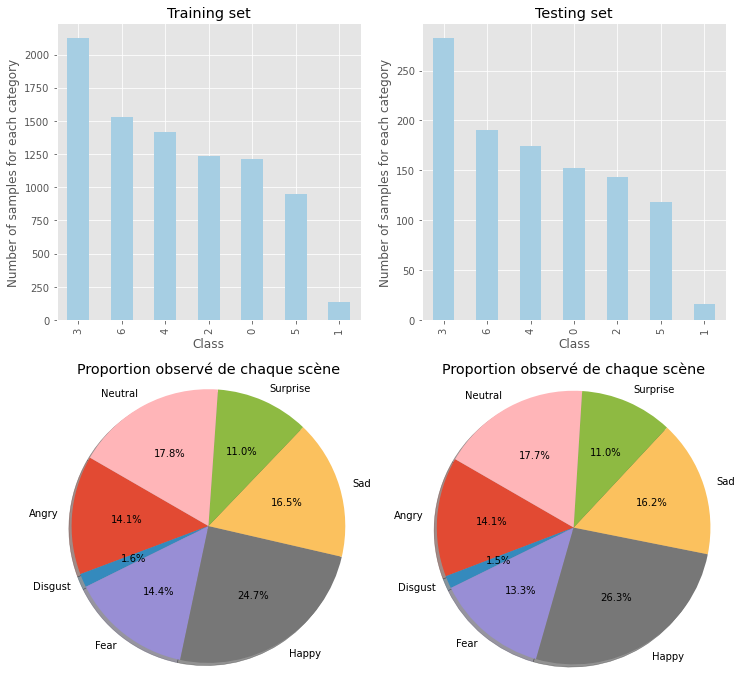

In [11]:
plt.figure(figsize=(12,12))
y_train_df = pd.DataFrame(data = y_train, columns = ['class'])
y_test_df = pd.DataFrame(data = y_test, columns = ['class'])
plt.subplot(221)
y_train_df['class'].value_counts().plot(kind = 'bar', colormap = 'Paired')
plt.xlabel('Class')
plt.ylabel('Number of samples for each category')
plt.title('Training set')
plt.subplot(222)
y_test_df['class'].value_counts().plot(kind = 'bar', colormap = 'Paired')
plt.xlabel('Class')
plt.ylabel('Number of samples for each category')
plt.title('Testing set')
plt.subplot(223)
sizes = np.bincount(y_train)
explode = (0, 0, 0, 0, 0, 0,0)  
plt.pie(sizes, explode=explode, labels=emotion,
autopct='%1.1f%%', shadow=True, startangle=150)
plt.axis('equal')
plt.title('Proportion observée de chaque scène')
plt.subplot(224)
sizes = np.bincount(y_test)
explode = (0, 0, 0, 0, 0, 0,0)  
plt.pie(sizes, explode=explode, labels=emotion,
autopct='%1.1f%%', shadow=True, startangle=150)
plt.axis('equal')
plt.title('Proportion observée de chaque scène')

plt.show()

Nous Voyons que sur les données d'entrainement l'émotion la plus représenté est celle des Heureux (Happy) et également en ce qui concerne les donnée de test. Cependant dans les 2 jeux de données l'émotion **Disgust**  a la plus faible proportion, nous pouvons dire que l'écart des effectifs est énorme entre les classes **Happy** et **Disgust** par exemple on pourrait même supprimer les images de la classe disgust ou bien les rassembler dans la classe des images **Triste (Sad)** par exemple en effet une personne dégouté peut etre considéré comme triste , en tout cas ces gransds écarts de proportion pourrait avoir un impact sur l'apprentissage 

Matrice de confusion 

Ici nous mettons en place un programme qui renvoie la matrice de confusion de nos modèle afin d'évaluer la qualité d'une classification et nous donne un aperçu du classement de nos points.

La matrice de confusion fournit:

$\bullet$ Nombre de vrai positif (VP)

$\bullet$ Nombre de faux positif (FP)

$\bullet$ Nombre de faux négatif (FN)

$\bullet$ Nombre de vrai négatif (VN)

Implémentons une fonction qui renvoie la matrice de confusion, de plus cette fonction renverra la courbe [Roc](https://fr.wikipedia.org/wiki/Courbe_ROC#:~:text=La%20fonction%20d'efficacité%20du,est%20une%20mesure%20de%20la) dont la métrique AUC-ROC nous renseignera sur la capacité du modèle à distinguer les classes. Plus l'AUC est élevée pour une classe, meilleur est le modèle cette valeur est entre 0 et 1 il s'agit d'une aire.

![Dossier.](https://i.stack.imgur.com/7QIRU.gif)


In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve 
from sklearn import metrics
from sklearn.metrics import auc 
import itertools

On définit une fonction plot_confusion_matrix qui nous permettra d'afficher la matrice de confusion la courbe Roc et le tableau des métriques de classification.

In [13]:
def plot_confusion_matrix(y_pred, y, classes=None, normalize=False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    title='Confusion matrix'
    cmap=plt.cm.Blues
    
    cm = confusion_matrix(y, y_pred)
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    
    if classes is None:
        classes = np.unique(y)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized confusion matrix'
    else:
        title = 'Unnormalized confusion matrix'
    plt.figure(figsize=(15, 15))
    plt.subplot(221)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    #plt.show()
#2 Roc Curves 

    a=y
    prediction=y_pred
    yp_dum=pd.get_dummies(a)
    yt_dum=pd.get_dummies(prediction)
    CM = confusion_matrix(a, prediction)
    class_names=np.unique(np.array(CM)) #Utilisé pour la visualisation de la matrice de confusion.
  # Calculer la courbe ROC et l'aire ROC pour chaque classe
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(class_)):
        fpr[i], tpr[i], _ = roc_curve(yt_dum[i], yp_dum[i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    #plt.figure() 
    colors=["blue","darkviolet","magenta","orange","gold","red","black"]
    class_list=np.unique(np.array(y))
    plt.subplot(222)
    for i, color, emotion in zip(range(len(class_)), colors, class_list):
        
        plt.plot(fpr[i], tpr[i], color=color,label='Courbe ROC de la classe %s (aire = %.2f)' %(class_[emotion], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taux de faux positifs')
    plt.ylabel('Taux de vrai positifs')
    plt.title('Une certaine extension de la caractéristique de fonctionnement du récepteur à plusieurs classes')
    plt.legend(bbox_to_anchor=(1.05,1),loc="upper left",borderaxespad=0.)
    plt.subplots_adjust(wspace=.3)
    plt.show()
#3 classification report
    print(metrics.classification_report(y, y_pred))

Affichage de 25 images 

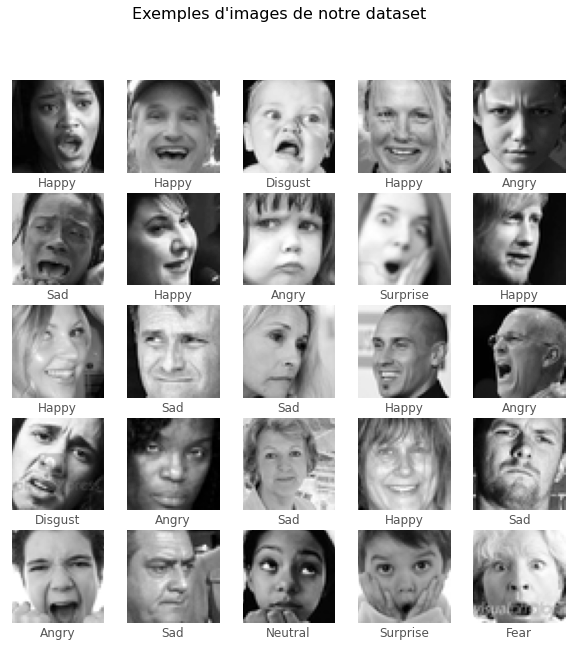

In [14]:
fig = plt.figure(figsize=(10,10))
fig.suptitle("Exemples d'images de notre dataset", fontsize=16)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train.reshape(8612, 48, 48)[i], cmap=plt.cm.gray)
    plt.xlabel(emo[y_train[i]])
plt.show()

## <a name="aei"> Apprentissage avec notre propre modèle</a>


On convertit nos vecteurs de classe y en matrice de classe binaire.

In [15]:
import keras
import tensorflow

num_classes = nb_classes 

y_train_tf = keras.utils.to_categorical(y_train, num_classes)
y_test_tf = keras.utils.to_categorical(y_test, num_classes)
y_val_tf = keras.utils.to_categorical(y_val, num_classes)
X_val = X_val.reshape((-1,48,48,1)).astype(np.float32)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout, BatchNormalization

### <a name="cme1"> Choix du modèle, entraînement et évaluation </a>


l'architecture de notre premier modèle que nous avons choisis est le [modèle](#arc) vu précédemment: 

$\bullet$ Les couches convolutionnelles (Conv2D) ,

$\bullet$ La mise en commun des couches (pour les caractéristiques de sous-échantillonnage)

$\bullet$ Des couches denses (Denses pour le classificateur de sortie)

$\bullet$ Batch Normalization (pour éviter le sur-ajustement ou overffiting  des modèles)

Pour les fonctions d'activation de notre réseau de neurones, nous avons choisi la fonction **Relu** en entré et **Softmax** en sortie, notre optimizeur sera [**Adam**](#ada) et pour la fonction de perte nous allons utiliser la fonction  [categorigal_crossentropy](#desgr)

In [17]:
with tensorflow.device("/gpu:0"):
    model = Sequential()
    input_shape = (48,48,1)
    model.add(Conv2D(64, (3, 3), input_shape=input_shape,activation='relu', padding='same')) # couche conv 
    model.add(MaxPooling2D(pool_size=(2, 2)))  #couche pooling 
    model.add(BatchNormalization()) #couche de batch
  

    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    model.add(Conv2D(256, (5, 5),activation='relu',padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    model.add(Flatten()) # Conversion des matrices 2D en vecteur 1D
    model.add (Dense (512, activation='relu')) # Ajout de la première couche fully-connected, suivie d'une couche ReLU
    model.add(Dense(nb_classes,activation ='softmax')) # Ajout de la dernière couche fully-connected qui permet de classifier
    
    my_optimiser = tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam')

    model.compile(optimizer=my_optimiser, loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 12, 12, 128)       512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 256)       8

Nous entrainons maintenant le modèle nous avons choisis 30 epochs avec un batch size =128, le batch size est de préférence une puissance de 2.

In [18]:
with tf.device("/gpu:0"):
  Model = model.fit(X_train, y_train_tf, epochs = 30, batch_size=128, verbose=1,validation_data=(X_val, y_val_tf))

Epoch 1/30
68/68 [==============================] - 3s 22ms/step - loss: 3.2482 - accuracy: 0.2437 - val_loss: 7.0249 - val_accuracy: 0.2667
Epoch 2/30
68/68 [==============================] - 1s 16ms/step - loss: 1.6062 - accuracy: 0.3670 - val_loss: 13.8524 - val_accuracy: 0.2677
Epoch 3/30
68/68 [==============================] - 1s 15ms/step - loss: 1.4670 - accuracy: 0.4501 - val_loss: 21.5752 - val_accuracy: 0.2677
Epoch 4/30
68/68 [==============================] - 1s 16ms/step - loss: 1.2788 - accuracy: 0.5168 - val_loss: 20.0844 - val_accuracy: 0.1673
Epoch 5/30
68/68 [==============================] - 1s 16ms/step - loss: 1.1754 - accuracy: 0.5533 - val_loss: 19.3954 - val_accuracy: 0.2695
Epoch 6/30
68/68 [==============================] - 1s 16ms/step - loss: 0.9797 - accuracy: 0.6395 - val_loss: 24.4448 - val_accuracy: 0.2677
Epoch 7/30
68/68 [==============================] - 1s 16ms/step - loss: 0.8036 - accuracy: 0.7097 - val_loss: 22.1613 - val_accuracy: 0.1673
Epoch 8


Dans la phase d'entrainement (train), le modèle produit une précision d'environ 99,89% avec une perte d'environ 0,0030.  et pour la validation respectivement 55.11% et une perte de 2.40. Ces résultats indiquent que la précision est plus que bonne **(overfitting)** sur nos données train mais les écarts avec l'ensemble de validation sont assez importante.

In [19]:
score = model.evaluate(X_test, y_test_tf, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

34/34 [==============================] - 0s 4ms/step - loss: 2.3493 - accuracy: 0.5493
Test loss: 2.349334478378296
Test accuracy: 0.5492565035820007


**Précision de 54.92% sur nos données test avec une perte de 2.35.**

---------------------------------------------Modèle Rapport------------------------------------------------------------


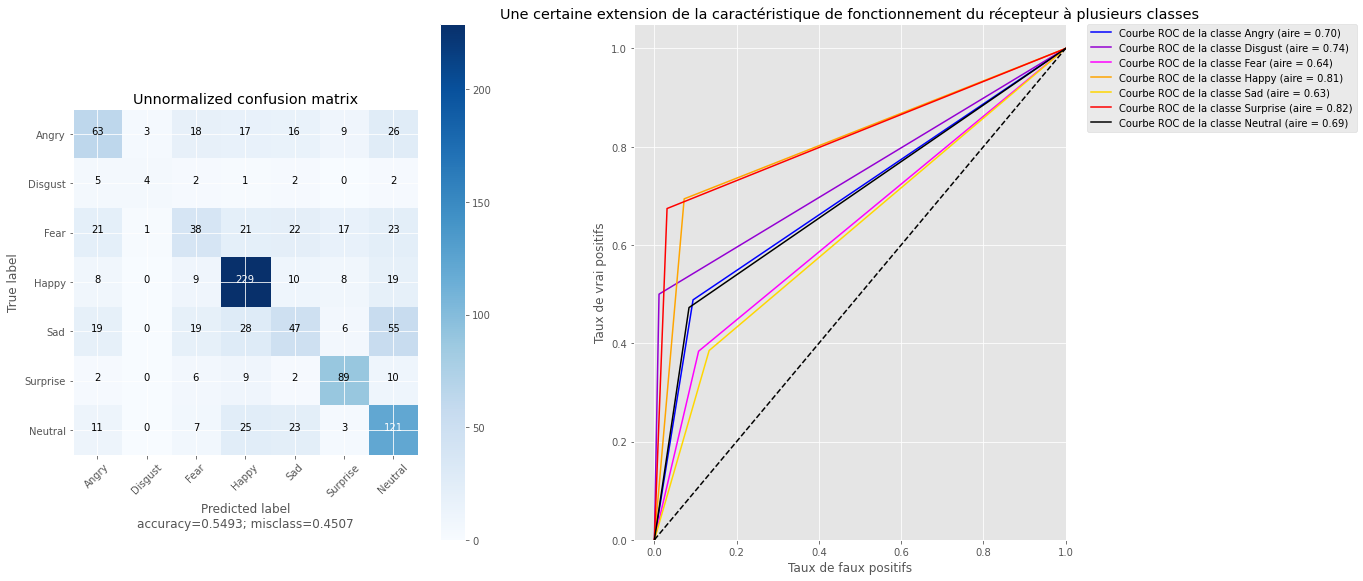

              precision    recall  f1-score   support

           0       0.49      0.41      0.45       152
           1       0.50      0.25      0.33        16
           2       0.38      0.27      0.31       143
           3       0.69      0.81      0.75       283
           4       0.39      0.27      0.32       174
           5       0.67      0.75      0.71       118
           6       0.47      0.64      0.54       190

    accuracy                           0.55      1076
   macro avg       0.51      0.49      0.49      1076
weighted avg       0.53      0.55      0.53      1076



In [20]:
# Prévoir les valeurs à partir de l'ensemble des données de test
Y_pred = model.predict(X_test)
# Convertir les classes de prédictions en one hot vector (va remplacer le max par 1 et tt les autres par 0)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convertir les observations de validation en un seul one hot vector
Y_true = np.argmax(y_test_tf,axis = 1) 

print("---------------------------------------------Modèle Rapport------------------------------------------------------------")
plot_confusion_matrix( Y_pred_classes,Y_true,emo)
plt.show()


Après avoir évalué le modèle de test, la précision est de **54,93%**, la valeur est inférieur aux résultats de la précision dans la phase de formation (train) (0.54< 0.99) avec une valeur de perte de 2,34 où cette valeur est supérieure aux résultats dans la phase de formation. A partir de ces résultats, nous pouvons conclure qu'il y a des différences assez importantes, ce qui signifie que notre **modèle est indiqué par un surajustement (Overfitting)** 

![](https://i.stack.imgur.com/rpqa6.jpg)

malgré la présence de notre couche batch normalization. Pour voir plus clairement les résultats de l'évaluation, nous pouvons consulter les courbes sur la précision et sur la perte sur nos données train et validation . les courbes rouges et bleues doivent etre très proche et ne pas s'éloigner.

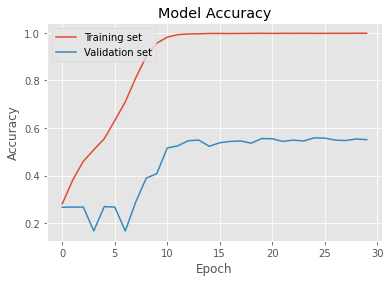

In [21]:
plt.plot(Model.history['accuracy'])
plt.plot(Model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()



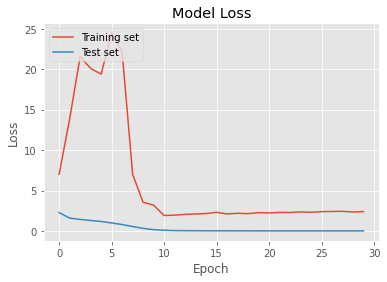

In [22]:
plt.plot(Model.history['val_loss'])
plt.plot(Model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()

Nous consatatons de grandes différences, notre modèle n'est pas bon avec de l'overfiting essayons d'améliorer le modèle en ajoutant des couches Dropout 

<a name="drop2"></a>  
#### <a name="acd"> Ajout de couche [Dropout](#drop)  </a>



Nous reprenons notre modèle précédent en ajoutant des couches dropout, pour éviter **l'overfitting**, dropout(0.5) signifie que nous retirons 50%

In [23]:
with tensorflow.device("/gpu:0"):
    model1 = Sequential()
    input_shape = (48,48,1)
    model1.add(Conv2D(64, (3, 3), input_shape=input_shape,activation='relu', padding='same'))
    model1.add(MaxPooling2D(pool_size=(2, 2)))
    model1.add(BatchNormalization())
    model1.add(Dropout(0.25))
  

    model1.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model1.add(MaxPooling2D(pool_size=(2, 2)))
    model1.add(BatchNormalization())
    model1.add(Dropout(0.5))

    model1.add(Conv2D(256, (5, 5),activation='relu',padding='same'))
    model1.add(MaxPooling2D(pool_size=(2, 2)))
    model1.add(BatchNormalization())
    model1.add(Dropout(0.5))

    model1.add(Flatten())
    model1.add (Dense (512, activation='relu'))
    model1.add(Dropout(0.5))
    model1.add(Dense(nb_classes,activation ='softmax')) # nous avons 7 classes et nopus utiliserons softmax
    
    my_optimiser = tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam')

    model1.compile(optimizer=my_optimiser, loss='categorical_crossentropy', metrics=['accuracy'])
    model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 12, 12, 128)      

On entraîne notre nouveau modèle avec 60 epochs et un batch size =128

In [24]:
with tf.device("/gpu:0"):
  Model1 = model1.fit(X_train, y_train_tf, epochs = 60, batch_size=128, verbose=1,validation_data=(X_val, y_val_tf))

Epoch 1/60
68/68 [==============================] - 2s 19ms/step - loss: 3.4038 - accuracy: 0.2180 - val_loss: 2.9214 - val_accuracy: 0.1840
Epoch 2/60
68/68 [==============================] - 1s 17ms/step - loss: 1.8068 - accuracy: 0.2649 - val_loss: 5.9921 - val_accuracy: 0.1273
Epoch 3/60
68/68 [==============================] - 1s 17ms/step - loss: 1.7164 - accuracy: 0.3163 - val_loss: 8.0392 - val_accuracy: 0.1273
Epoch 4/60
68/68 [==============================] - 1s 17ms/step - loss: 1.6536 - accuracy: 0.3424 - val_loss: 7.2673 - val_accuracy: 0.1264
Epoch 5/60
68/68 [==============================] - 1s 17ms/step - loss: 1.6033 - accuracy: 0.3687 - val_loss: 7.9742 - val_accuracy: 0.1450
Epoch 6/60
68/68 [==============================] - 1s 17ms/step - loss: 1.5671 - accuracy: 0.3851 - val_loss: 6.1900 - val_accuracy: 0.1413
Epoch 7/60
68/68 [==============================] - 1s 17ms/step - loss: 1.5146 - accuracy: 0.4116 - val_loss: 5.0434 - val_accuracy: 0.1868
Epoch 8/60
68

Score de 89.16% sur nos données train et 54% sur nos données de validation malheureusement, on a encore un risque d'overfitting ....

In [25]:
score = model1.evaluate(X_test, y_test_tf, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

34/34 [==============================] - 0s 3ms/step - loss: 1.6310 - accuracy: 0.5632
Test loss: 1.6309517621994019
Test accuracy: 0.5631970167160034


**56.32% sur nos données Test.**

---------------------------------------------Modèle1 Rapport------------------------------------------------------------


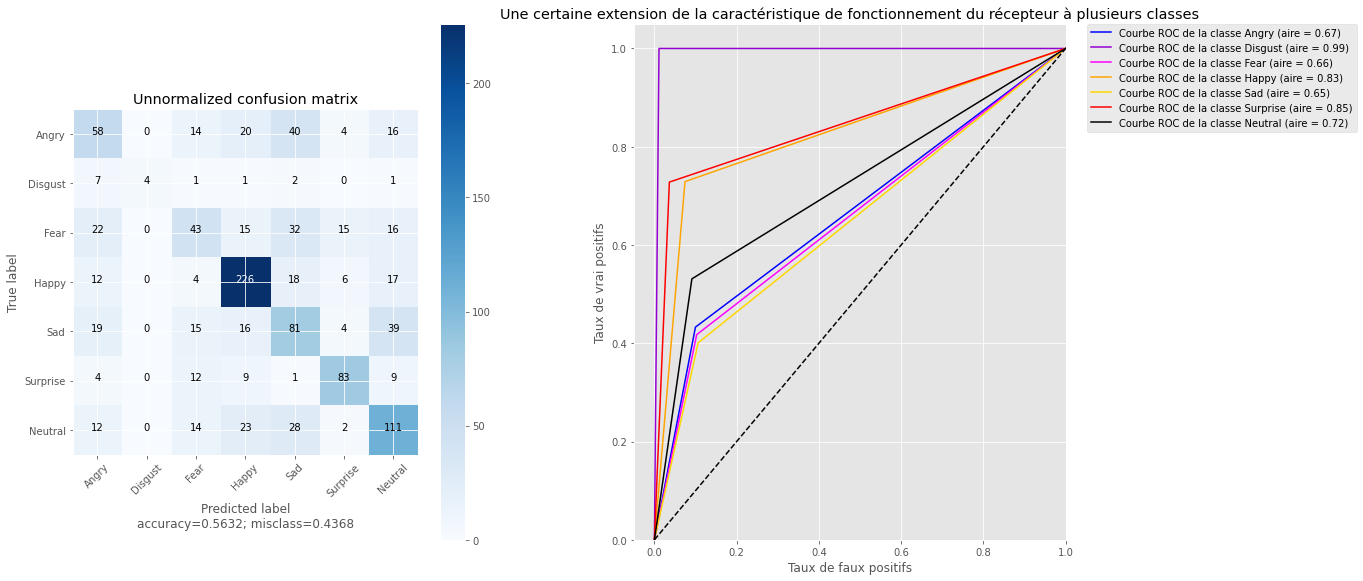

              precision    recall  f1-score   support

           0       0.43      0.38      0.41       152
           1       1.00      0.25      0.40        16
           2       0.42      0.30      0.35       143
           3       0.73      0.80      0.76       283
           4       0.40      0.47      0.43       174
           5       0.73      0.70      0.72       118
           6       0.53      0.58      0.56       190

    accuracy                           0.56      1076
   macro avg       0.61      0.50      0.52      1076
weighted avg       0.56      0.56      0.56      1076



In [26]:
# Prévoir les valeurs à partir de l'ensemble des données de test
Y_pred = model1.predict(X_test)
# Convertir les classes de prédictions en one hot vector (va remplacer le max par 1 et tt les autres par 0)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convertir les observations de validation en un seul one hot vector
Y_true = np.argmax(y_test_tf,axis = 1) 

print("---------------------------------------------Modèle1 Rapport------------------------------------------------------------")
plot_confusion_matrix(Y_pred_classes,Y_true,emo)
plt.show()

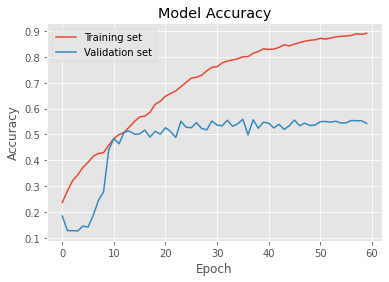

In [27]:
plt.plot(Model1.history['accuracy'])
plt.plot(Model1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()


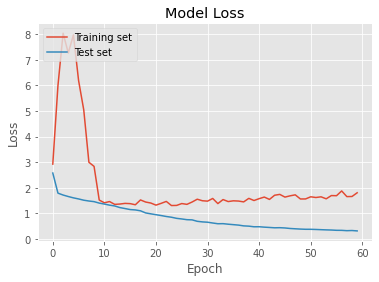

In [28]:
plt.plot(Model1.history['val_loss'])
plt.plot(Model1.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()

Malgré l'ajout de couches dropout nous avons de l'overfitting mais nous avons une amélioration par rapport au premier modèle, en effet les courbes ci dessus sont plus proche que dans notre premier modèle.

## <a name="aik"> Apprentissage avec ImageDataGenerator de Kéras  </a>


Dans cette partie Nous utilisons la classe de Keras: ImageDataGenerator 

Principe: Cette classe accepte un lot d'images utilisé pour la formation
puis y applique une série de transformations aléatoires à chaque image du lot sa peut etre une rotation aléatoire , un redimensionnement, ou bien un cisaillement, etc.) ensuite elle remplace le lot original par le nouveau lot transformé et celà de manière aléatoire

Nous allons donc mettre en place un CNN sur ce lot transformé de manière aléatoire (c'est-à-dire que les données originales elles-mêmes ne serons pas utilisées pour la formation)

Tout d'abord préparons nos données afin de récupérer directement les images en les placant dans des dossiers pour chacune de nos 7 classes 

In [29]:
import matplotlib as mpl
%matplotlib inline
import os 
import sys
import time
import tensorflow as tf
#from tensorflow import keras
import scipy.misc as sm
import scipy
from PIL import Image

Code qui crée nos 3 fichiers csv  train , test et val dans le dossier fer2013

![csv.](https://imgconvert.csdnimg.cn/aHR0cDovL2ltZy5ibG9nLmNzZG4ubmV0LzIwMTgwMTExMDg0MzEyNzU1?x-oss-process=image/format,png)

In [30]:
import csv
database_path = '/fer2013/'
datasets_path = '/fer2013/'
csv_file = database_path+'fer2013.csv'
train_csv = datasets_path+'train.csv'
val_csv = datasets_path+'val.csv'
test_csv = datasets_path+ 'test.csv'
with open(csv_file) as f:
    csvr = csv.reader(f)
    header = next(csvr)
    print(header)
    rows = [row for row in csvr]
    trn = [row[:-1] for row in rows if row[-1] == 'Training']
    csv.writer(open(train_csv, 'w+'), lineterminator='\n').writerows([header[:-1]] + trn)
    print(len(trn))
    val = [row[:-1] for row in rows if row[-1] == 'PublicTest']
    csv.writer(open(val_csv, 'w+'), lineterminator='\n').writerows([header[:-1]] + val)
    print(len(val))        
    tst = [row[:-1] for row in rows if row[-1] == 'PrivateTest']
    csv.writer(open(test_csv, 'w+'), lineterminator='\n').writerows([header[:-1]] + tst)
    print(len(tst))

['emotion', 'pixels', 'Usage']
28709
3589
3589


Code qui à partir des 3 fichier csv train , test et val dans le dossier fer 2013 récupére les images grace aux pixels en les regroupant chacune dans un dossier train tes ou val qui contient des dossiers numérotée correspondant à la classe de l'image de 0 à 6 

![Dossier.](https://imgconvert.csdnimg.cn/aHR0cDovL2ltZy5ibG9nLmNzZG4ubmV0LzIwMTgwMTExMDg1MzMyMTIw?x-oss-process=image/format,png)

In [31]:
datasets_path = r'/fer2013'
train_csv = os.path.join(datasets_path, 'train.csv')
val_csv = os.path.join(datasets_path, 'val.csv')
test_csv = os.path.join(datasets_path, 'test.csv')
train_set = os.path.join(datasets_path, 'train')
val_set = os.path.join(datasets_path, 'val')
test_set = os.path.join(datasets_path, 'test')
for save_path, csv_file in [(train_set, train_csv), (val_set, val_csv), (test_set, test_csv)]:
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    num = 1
    with open(csv_file) as f:
        csvr = csv.reader(f)
        header = next(csvr)
        for i, (label, pixel) in enumerate(csvr):
            pixel = np.asarray([float(p) for p in pixel.split()]).reshape(48, 48)
            subfolder = os.path.join(save_path, label)
            if not os.path.exists(subfolder):
                os.makedirs(subfolder)
            im = Image.fromarray(pixel).convert('L')
            image_name = os.path.join(subfolder, '{:05d}.jpg'.format(i))
            #print(image_name)
            im.save(image_name)

On spécifie les chemins menant aux images 

In [32]:
train= "/fer2013/train/"
test= "/fer2013/test/"
val="/fer2013/val/"

Mettons en oeuvre ImageDataGenerator

In [33]:
from keras.preprocessing.image import ImageDataGenerator

In [34]:
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip=True)

train_generator = datagen_train.flow_from_directory(train,
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",  # pour avoir une taille (48,48,1)
                                                    batch_size=28709,  
                                                    class_mode='categorical')

datagen_test = ImageDataGenerator(horizontal_flip=True)
test_generator = datagen_test.flow_from_directory(test,
                                                  target_size=(img_size,img_size),
                                                  color_mode="grayscale",  
                                                  batch_size=3589,
                                                  class_mode='categorical')

datagen_val = ImageDataGenerator(horizontal_flip=True)
val_generator = datagen_val.flow_from_directory(val,
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=3589,
                                                    class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [35]:
X_train,y_train = train_generator.next()
X_test,y_test = test_generator.next()
X_val,y_val = val_generator.next()

In [36]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(28709, 48, 48, 1)
(28709, 7)
(3589, 48, 48, 1)
(3589, 7)
(3589, 48, 48, 1)
(3589, 7)


<a name="drop2idg"></a>  
### <a name="cme2"> Choix du modèle, entraînement et évaluation </a></a>


On reprend notre [modèle](#drop2)  précédent

In [37]:
with tensorflow.device("/gpu:0"):
    model2 = Sequential()
    input_shape = (48,48,1)

    model2.add(Conv2D(32, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
    model2.add(MaxPooling2D(pool_size=(2, 2)))
    model2.add(BatchNormalization())
    model2.add(Dropout(0.25))
    
    model2.add(Conv2D(64, (5, 5),activation='relu', padding='same'))
    model2.add(MaxPooling2D(pool_size=(2, 2)))
    model2.add(BatchNormalization())
    model2.add(Dropout(0.25))  # on met 0.25 ici
  

    model2.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model2.add(MaxPooling2D(pool_size=(2, 2)))
    model2.add(BatchNormalization())
    model2.add(Dropout(0.5))

    model2.add(Conv2D(256, (5, 5),activation='relu',padding='same'))
    model2.add(MaxPooling2D(pool_size=(2, 2)))
    model2.add(BatchNormalization())
    model2.add(Dropout(0.5))

    model2.add(Flatten())
    model2.add (Dense (512, activation='relu'))
    model2.add(Dropout(0.5))
    model2.add(Dense(nb_classes,activation ='softmax'))
    
    my_optimiser = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, amsgrad=False,
    name='Adam')

    model2.compile(optimizer=my_optimiser, loss='categorical_crossentropy', metrics=['accuracy'])
    model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 48, 48, 32)        832       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_4 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        51264     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 12, 12, 64)       

Un autre moyen d'ffichage de notre modèle

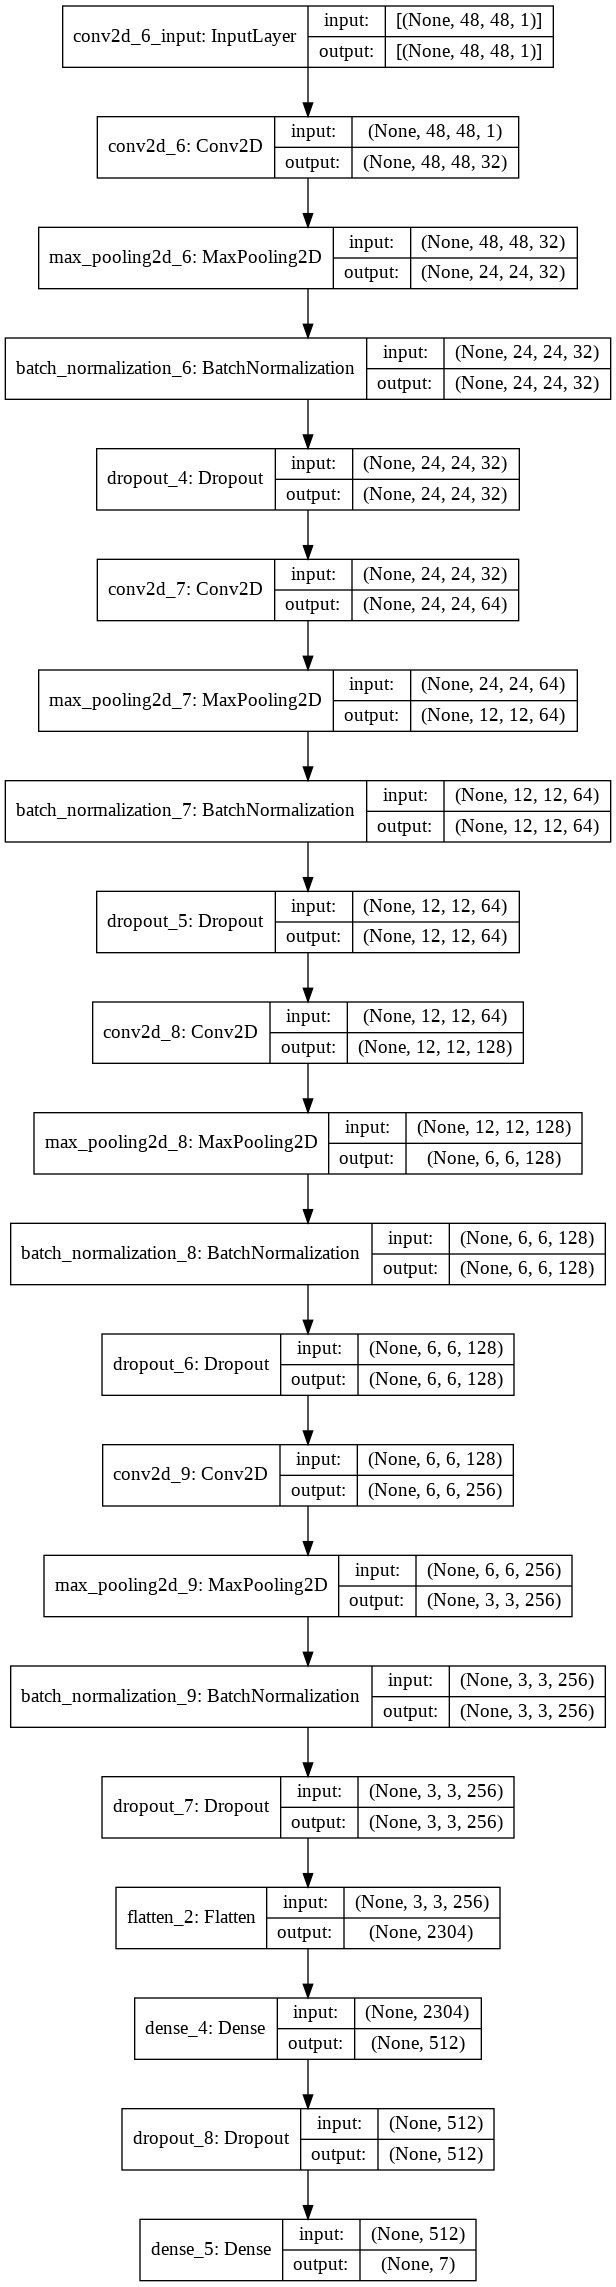

In [38]:
from tensorflow.keras.utils import plot_model
plot_model(model2, to_file='model.png', show_shapes=True, show_layer_names=True)

On entraîne notre modèle de la façon suivante avec 100 epochs et un batch size de 256.

In [39]:
Model = model2.fit(X_train, y_train, epochs = 100, batch_size=256, verbose=1, validation_data= (X_val, y_val))

Epoch 1/100
113/113 [==============================] - 4s 23ms/step - loss: 2.9891 - accuracy: 0.1981 - val_loss: 1.8315 - val_accuracy: 0.2675
Epoch 2/100
113/113 [==============================] - 2s 21ms/step - loss: 2.2082 - accuracy: 0.2286 - val_loss: 1.7805 - val_accuracy: 0.2903
Epoch 3/100
113/113 [==============================] - 2s 21ms/step - loss: 1.9275 - accuracy: 0.2343 - val_loss: 1.7713 - val_accuracy: 0.2881
Epoch 4/100
113/113 [==============================] - 2s 21ms/step - loss: 1.8516 - accuracy: 0.2520 - val_loss: 1.7532 - val_accuracy: 0.2661
Epoch 5/100
113/113 [==============================] - 2s 21ms/step - loss: 1.8088 - accuracy: 0.2636 - val_loss: 1.7323 - val_accuracy: 0.2823
Epoch 6/100
113/113 [==============================] - 2s 21ms/step - loss: 1.7955 - accuracy: 0.2693 - val_loss: 1.7167 - val_accuracy: 0.2951
Epoch 7/100
113/113 [==============================] - 2s 21ms/step - loss: 1.7695 - accuracy: 0.2806 - val_loss: 1.7007 - val_accuracy:

In [40]:
score = model2.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

113/113 [==============================] - 0s 3ms/step - loss: 1.1118 - accuracy: 0.6030
Test loss: 1.1118004322052002
Test accuracy: 0.6029534935951233


**Score de 60% sur nos données Test et une perte de 1.11.**

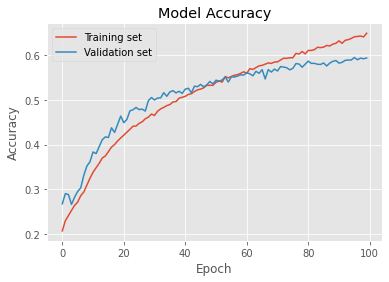

In [41]:
plt.plot(Model.history['accuracy'])
plt.plot(Model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()



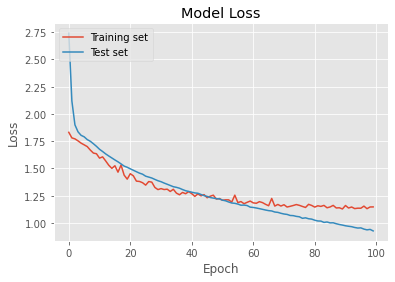

In [42]:
plt.plot(Model.history['val_loss'])
plt.plot(Model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()

Nous voyons clairement que notre meilleur est meilleur les 2 courbes des 2 deniers graphique s'éloigne légèrement mais cela est plutot correct par rapport à nos 2 précédents modèle.

In [43]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

---------------------------------------------Modèle2 Rapport------------------------------------------------------------


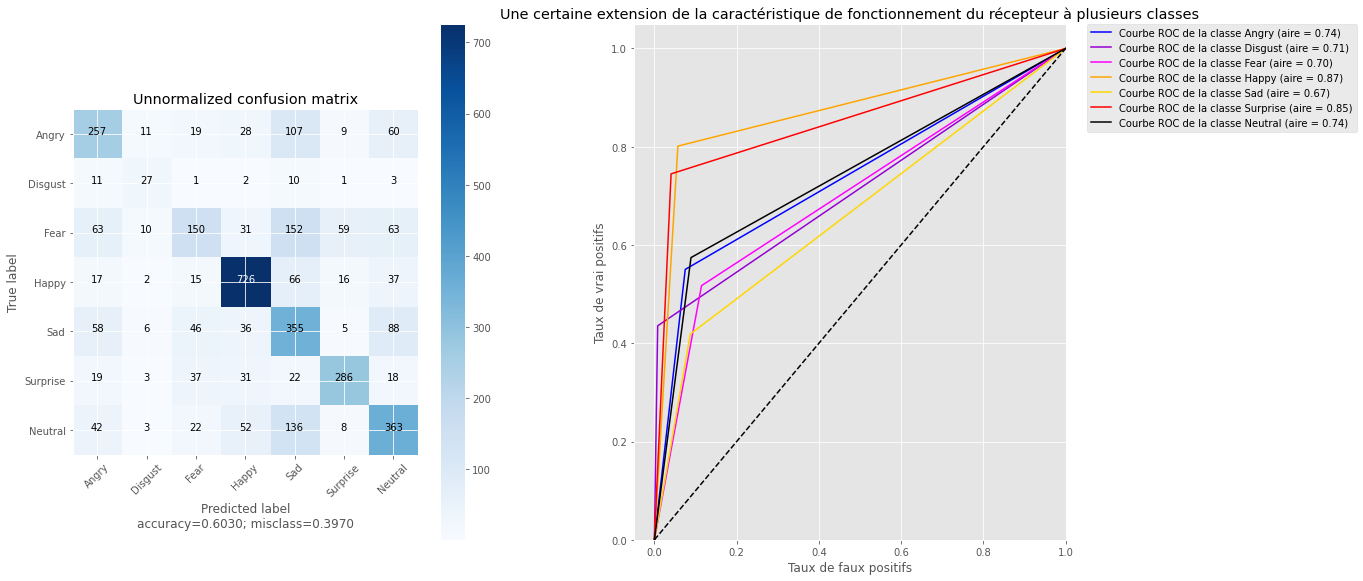

              precision    recall  f1-score   support

           0       0.55      0.52      0.54       491
           1       0.44      0.49      0.46        55
           2       0.52      0.28      0.37       528
           3       0.80      0.83      0.81       879
           4       0.42      0.60      0.49       594
           5       0.74      0.69      0.71       416
           6       0.57      0.58      0.58       626

    accuracy                           0.60      3589
   macro avg       0.58      0.57      0.57      3589
weighted avg       0.61      0.60      0.60      3589



In [44]:
Y_pred = model2.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
y_test2= np.argmax(y_test, axis=1)


print("---------------------------------------------Modèle2 Rapport------------------------------------------------------------")
plot_confusion_matrix (y_pred,y_test2,emo)
plt.show()

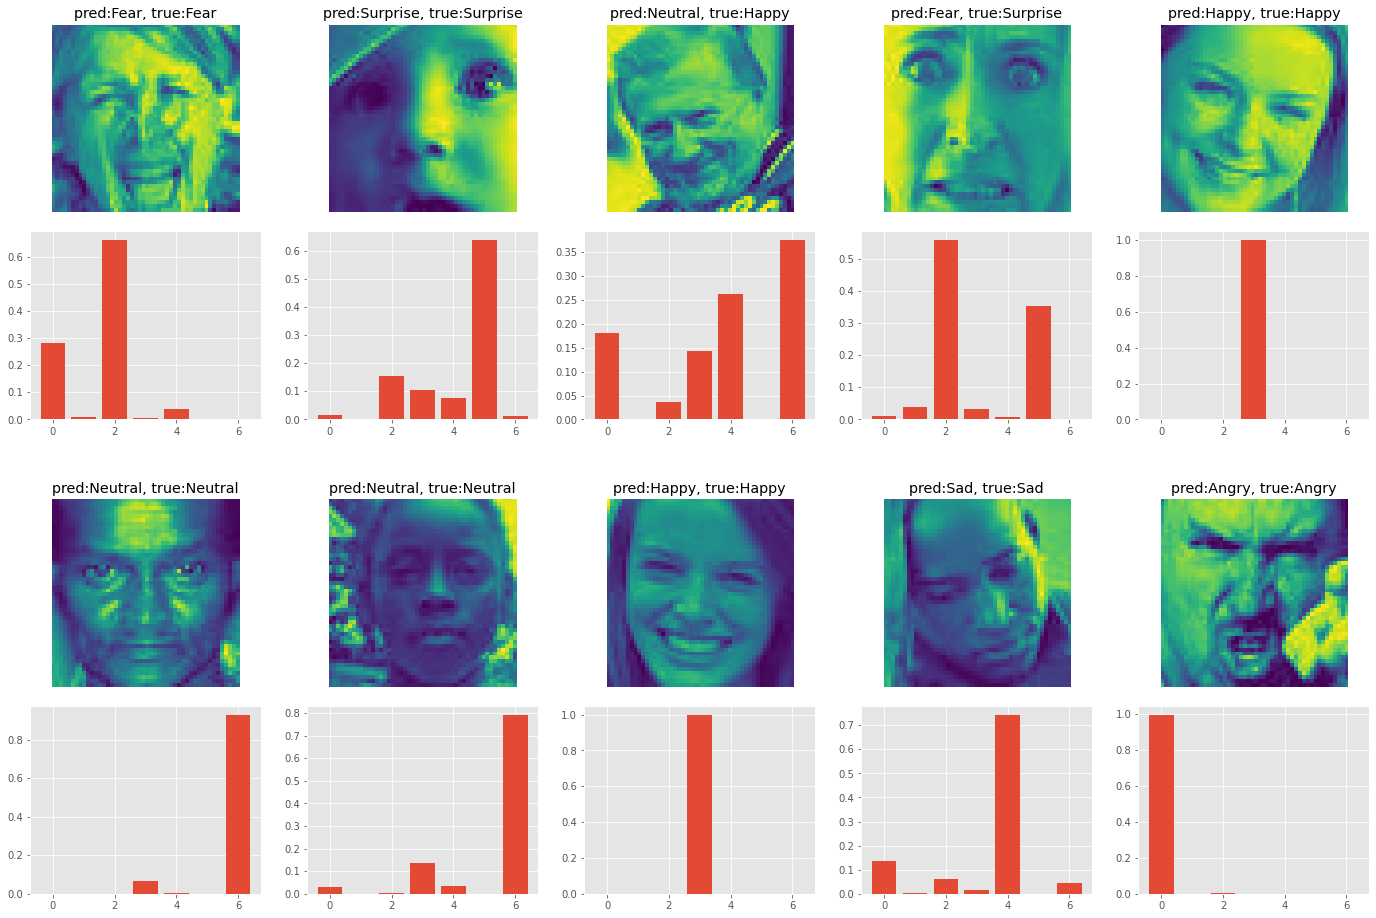

In [45]:
import matplotlib.gridspec as gridspec
from random import randint
fig = plt.figure(figsize=(24, 16))
outer = gridspec.GridSpec(2, 5, wspace=0.2, hspace=0.2)
for i in range(10):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(X_test))
    X_test1 = np.array([X_test[rnd_number]])
    y_test1 = np.array([y_test[rnd_number]])
    pre_labels = model2.predict(X_test1)
    pred_prob = pre_labels.reshape(7)
    for j in range(2):
        if (j%2) == 0:
            ax = plt.Subplot(fig, inner[j])
            ax.imshow(X_test1[0].reshape(48,48))
            ax.set_title('pred:{}, true:{}'.format(get_classlabel(int(np.argmax(pre_labels, axis = 1))),get_classlabel(int(np.argmax(y_test1, axis = 1)))))
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plt.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5,6],pred_prob)
            fig.add_subplot(ax)

### <a name="ti1"> Test sur une image</a>

Nous allons sauvegarder notre dernier puis nous le réutiliserons pour effectuer une prédiction sur une image.

In [46]:
from keras.models import load_model
from IPython.display import display, Image
import cv2
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing.image import img_to_array

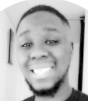

[[2.7848585e-02 1.7944671e-05 1.8630486e-02 7.4750644e-01 7.6305822e-02
  2.1015990e-03 1.2758902e-01]] Happy


In [47]:
#Save the model
model2.save("model2.hdf5")
#Test the model
img_rows = 48
img_cols = 48

model = load_model('/content/model2.hdf5')

file = '/linkedIn.png'

img = cv2.cvtColor(cv2.imread(file),cv2.COLOR_RGB2GRAY)
img
img = cv2.resize(img, (img_rows,img_cols))

test_image = tf.keras.preprocessing.image.img_to_array(img)
test_image = np.expand_dims(test_image, axis=0)
pred = model.predict(test_image)
img = cv2.imread('/linkedIn.png',0)
cv2_imshow(img)
pred
print(pred, get_classlabel(np.argmax(pred)))


La classe prédite est Happy ce qui est correct!

## <a name="tl"> Avec le Transfert Learning </a>


<a name="resnet"></a> 
### <a name="resn"> ResNet50</a>

ResNet , abréviation de Residual Networks, est un réseau neuronal classique utilisé comme épine dorsale pour de nombreuses tâches de vision par ordinateur. Ce modèle a remporté le défi ImageNet en 2015. La percée fondamentale avec ResNet a été qu'il nous a permis de former avec succès des réseaux de neurones extrêmement profonds avec plus de 150 couches. Avant la formation du ResNet, les réseaux de neurones très profonds étaient difficiles à apprendre en raison du problème de la disparition des gradients.

Nous allons utilisé un modèle ResNet50 pour Fer2013, pré-entrainé et que nous avons trouvé [ici](https://github.com/ivadym/FER/tree/master/trained_models) nous n'utiliserons pas le [modèle](https://keras.io/api/applications/resnet/) pré-entrainé de Kéras 

In [48]:
import zipfile 
zip_ref=zipfile.ZipFile("/content/drive/My Drive/ResNet-50.zip",'r')
zip_ref.extractall('/fer2013')
zip_ref.close()

In [49]:
from tensorflow.python.lib.io import file_io
from skimage.transform import resize
from sklearn.metrics import classification_report, accuracy_score

In [50]:
# taille des images pour ResNet
img_width, img_height =	197, 197      

# Test data
test_data_dir = "/fer2013/test.csv"

# Rétablir le modèle finement ajusté 
model = load_model('/fer2013/ResNet-50.h5')

batch_size = 1

### <a name="pdt"> Préparation des données de test</a>

Nous allons maintenant préparé les données **images** de facons à avoir des images RGB pour notre modèle ResNet.

In [51]:
def preprocess_input(x):
  x -= 128.8006	# np.mean(train_dataset)
  x /= 64.6497	# np.std(train_dataset)
  return x

def get_data(dataset):

	file_stream = file_io.FileIO(test_data_dir, mode="r")
	data = pd.read_csv(file_stream)
	pixels = data["pixels"].tolist()
	images = np.empty((len(data), img_height, img_width, 3))
	i = 0
	
	for pixel_sequence in pixels:
	    single_image = [float(pixel) for pixel in pixel_sequence.split(" ")]	# Extraction de chaque images
	    single_image = np.asarray(single_image).reshape(48, 48)					# Dimension: 48x48
	    single_image = resize(single_image, (img_height, img_width), order = 3, mode = "constant") # Bicubic 197x197
	    ret = np.empty((img_height, img_width, 3))  #à remplir
	    ret[:, :, 0] = single_image
	    ret[:, :, 1] = single_image
	    ret[:, :, 2] = single_image
	    images[i, :, :, :] = ret
	    i += 1
	
	images = preprocess_input(images)
	labels = data["emotion"].tolist()

	return images, labels					


In [52]:
images, labels = get_data(test_data_dir)

In [53]:
print(images.shape)  #meme taille que nos données test mais en dimension 3: RGB 


(3589, 197, 197, 3)


### <a name="éval"> Évaluation</a>

Évaluons notre modèle en faisant nos prédictions et en prenant la classe ayant la probabilité maximale.

In [54]:
predictions = model.predict(images,batch_size	= batch_size)

predicted_classes	= np.argmax(predictions, axis = 1)	# Renvoie la classe (position de la ligne) de prédiction maximale
true_classes 		=  labels 								# Retourne les classes correctes associées aux prédiction

---------------------------------------------Modèle Transfer Learning------------------------------------------------------------


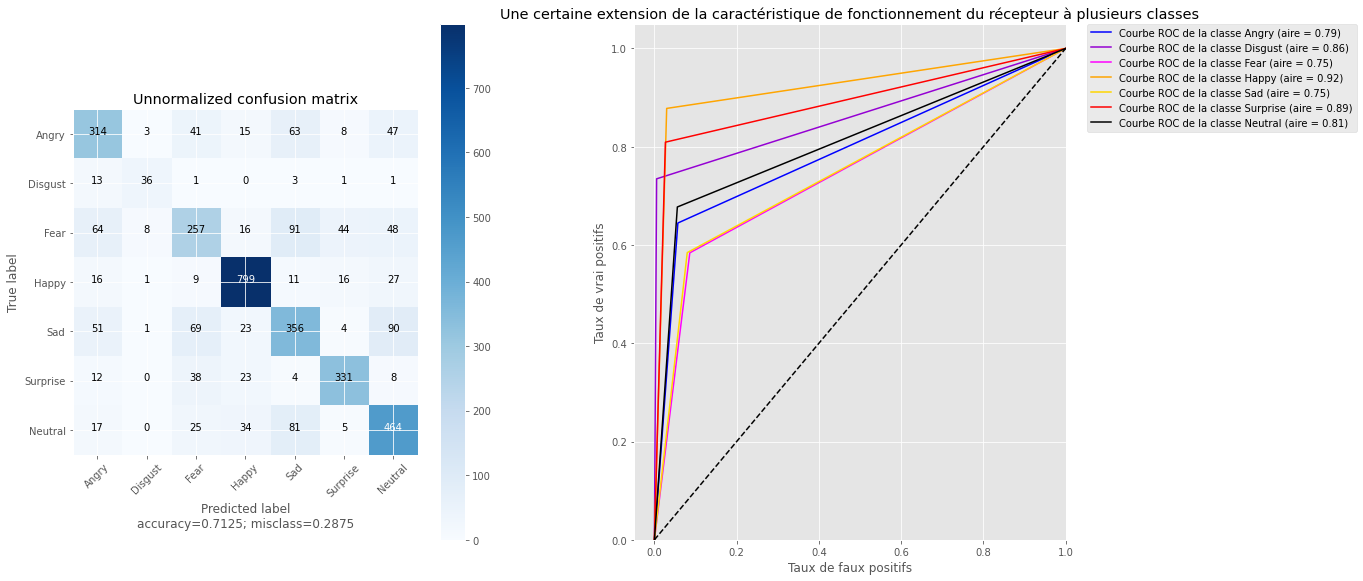

              precision    recall  f1-score   support

           0       0.64      0.64      0.64       491
           1       0.73      0.65      0.69        55
           2       0.58      0.49      0.53       528
           3       0.88      0.91      0.89       879
           4       0.58      0.60      0.59       594
           5       0.81      0.80      0.80       416
           6       0.68      0.74      0.71       626

    accuracy                           0.71      3589
   macro avg       0.70      0.69      0.69      3589
weighted avg       0.71      0.71      0.71      3589



In [55]:
print("---------------------------------------------Modèle Transfer Learning------------------------------------------------------------")
plot_confusion_matrix (predicted_classes,true_classes,emo)


**Nous avons une précision de 71.25% sur nos données images.**

Affichons quelques prédictions.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

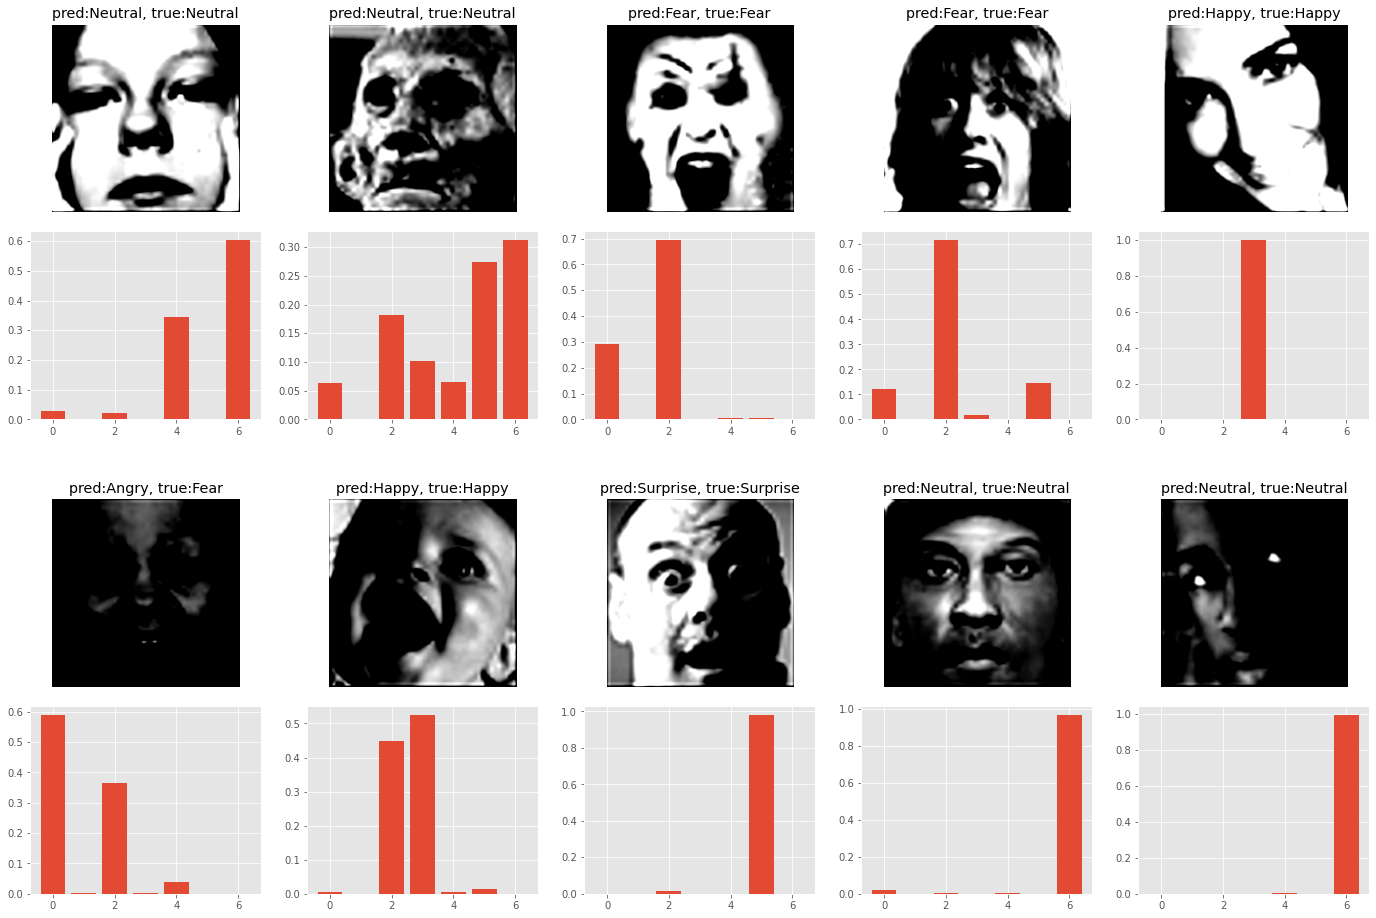

In [56]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(24, 16))
outer = gridspec.GridSpec(2, 5, wspace=0.2, hspace=0.2)
for i in range(10):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(images))
    X_test1 = np.array([images[rnd_number]])
    y_test1 = np.array([labels[rnd_number]])
    pre_labels = model.predict(X_test1)
    pred_prob = pre_labels.reshape(7)
    for j in range(2):
        if (j%2) == 0:
            ax = plt.Subplot(fig, inner[j])
            ax.imshow(X_test1[0])
            ax.set_title('pred:{}, true:{}'.format(get_classlabel(int(np.argmax(pre_labels, axis = 1))),get_classlabel(int(y_test1))))
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plt.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5,6],pred_prob)
            fig.add_subplot(ax)

### <a name="ti2"> Test sur une image</a>

[[0.0136168  0.00057125 0.08293346 0.42218783 0.11802197 0.01311121
  0.34955743]] Happy


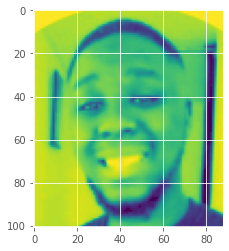

In [57]:
#Test the model
img_rows = 197
img_cols = 197

file = '/linkedIn.png'
img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
img_input = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

img_rgb = img.copy()


img_rgb = (img_rgb / 255.).astype(np.float32)


input_img = cv2.resize(img_rgb, (img_rows, img_cols))
img = np.reshape(input_img,[1,img_rows,img_cols,3])
pred = model.predict(img)
img = cv2.imread('/linkedIn.png',0)
#cv2_imshow(img)
plt.imshow(img)
print(pred, get_classlabel(np.argmax(pred)))


# <a name="3">III. Conclusion </a>

Tout au long de notre projet nous avons pu voir une introduction au **Deep Learning** dans la clasification d'image et différents modèles qu'on a pu améliorer par l'ajout de couches de Dropout par exemple.

Comme on aurait pu s'y attendre il est difficile de distinguer les émotions faciales, la classe la mieux prédite est sans aucun doute **Happy**. Le tableau suivant nous montre les différents score obtenue.

|Modèle | Score | 
|---|---|
[model](#cme1)| 54%|
[model1](#drop2) | 56%|
[model2 Image Data Générator](#drop2idg)| 60% |
[model Resnet transfer learning](#resnet) | 71% |

         

## <a name="ref">Références</a>

- [Openclassroom: Initiez-vous au Deep Learning](https://openclassrooms.com/fr/courses/5801891-initiez-vous-au-deep-learning)

- [Github khipu-ai: Optimization](https://github.com/khipu-ai/practicals-2019/blob/master/1b_optimization.ipynb)

- [Prepare data fer2013](https://www.programmersought.com/article/44663859474/)

- [Kaggle, Tutorial : Facial Expression Classification Keras](https://www.kaggle.com/ashishpatel26/tutorial-facial-expression-classification-keras)

- [Github Ivady: Transfer learning Model  Fer](https://github.com/ivadym/FER/tree/master/trained_models)
